<a href="https://colab.research.google.com/github/Srishti6125/Online-Retail-Segmentation/blob/main/Online_Retail_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type -** Clustering
##### **Contribution -** Individual
##### **Name -** Srishti  Singhal

# **Project Summary -**

This project focuses on customer segmentation through unsupervised learning, using an Online Retail dataset comprising detailed transaction records like InvoiceNo, StockCode, Description, Quantity, UnitPrice, InvoiceDate, and CustomerID.

**Data Wrangling & Preprocessing:**
* Cleaned the dataset by removing nulls and duplicates.
* Handled outliers in Quantity, UnitPrice, and derived Total_Price using IQR method.
* Created new features including InvoiceMonth and performed RFM (Recency, Frequency, Monetary) analysis to quantify customer value.

**Exploratory Data Analysis:**

Following the UBM Rule:
* Univariate Analysis revealed purchase frequency and pricing distributions.
* Bivariate & Multivariate Analysis gave insight into relationships between product sales, purchase frequency, invoice timing, and price sensitivity.

**Visualization:**
* Used Plotly, Seaborn, and Matplotlib to build 15+ insightful visualizations.
* Created 2D and 3D plots to clearly represent cluster distribution and behavioral segmentation.
* Visual storytelling was used to explain customer profiles and seasonal purchasing trends.

**Clustering Techniques Used:**

* K-Means Clustering
  * Performed on scaled RFM data.
  * Optimal clusters determined via Elbow Method and Silhouette Score.
  * Segmented customers into meaningful groups like “Champions”, “Loyal Customers”, “At Risk”, etc.
* DBSCAN (Density-Based Clustering)
  * Explored to identify noise and arbitrarily shaped clusters.
  * While less interpretable in this case, it highlighted the presence of potential anomalies or dense customer groups.
* Agglomerative Clustering
  * Used as a hierarchical approach to validate cluster consistency.
  * Dendrograms helped visualize the merging of clusters and revealed the natural grouping tendency in the data.
  * Helped cross-check results from K-Means and DBSCAN and added robustness to our segmentation insights.



# **GitHub Link -**

https://github.com/Srishti6125/Online-Retail-Segmentation

# **Problem Statement**


The objective of this project is to perform customer segmentation using unsupervised learning techniques on an Online Retail dataset. The goal is to uncover distinct groups within the customer base based on their transactional behavior, allowing businesses to tailor marketing strategies, improve customer satisfaction, and optimize resource allocation. By leveraging clustering models such as K-Means, DBSCAN and Agglomerative Clustering , the project aims to identify patterns that can directly contribute to business growth and operational efficiency.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS

import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import DBSCAN
from sklearn import metrics

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/Copy of Online Retail.xlsx - Online Retail.csv")

### Dataset First View

In [ ]:
# Dataset First Look

df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

df.shape

(541909, 8)

#### Dataset Information

In [ ]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

df.duplicated().sum()

np.int64(5268)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Visualizing the missing values

fig = px.bar(df.isnull().sum(), title="Missing Values", color=df.isnull().sum().index, color_discrete_sequence=px.colors.qualitative.Antique)

fig.update_layout(xaxis_title="Columns", yaxis_title="Missing Values",title_x=0.5)
fig.show()

### What did you know about your dataset?

This dataset is based on information about online retailing.

It consists details regarding invoice number, invoice date, stock code, description of product, quantity, unit price, customer id and country.

There in total 541909 records, with 0 duplicate values.

There are null values present in column description (1454) and customer id(135080).

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe

df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

### Variables Description

* InvoiceNo	- Unique invoice number. If it starts with 'C', it means the transaction was cancelled.
* StockCode	- Unique code for each item.
* Description -	Description of the item.
* Quantity - Number of units purchased. (Negative meaning returned items).
* InvoiceDate	- Date and time of the transaction.
* UnitPrice -	Price per unit.
* CustomerID	- Unique identifier for the customer.
* Country	- Country of the customer.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# checking null values

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# finding missing values percentage

(df.isnull().mean() * 100).round(3)

InvoiceNo       0.000
StockCode       0.000
Description     0.268
Quantity        0.000
InvoiceDate     0.000
UnitPrice       0.000
CustomerID     24.927
Country         0.000
dtype: float64

In [ ]:
# Drop rows with missing Description or CustomerID

df = df.dropna(subset=['Description', 'CustomerID'])

In [ ]:
df.shape

(406829, 8)

In [ ]:
# adding new column total price

df['Total_Price'] = df['Quantity'] * df['UnitPrice']

In [ ]:
# converting InvoiceDate into date time format

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# extracting invoice year, month, date, hour, minutes, seconds and day

df['Invoice_Year'] = df['InvoiceDate'].dt.year
df['Invoice_Month'] = df['InvoiceDate'].dt.month
df['Invoice_Date'] = df['InvoiceDate'].dt.day
df['Invoice_Hour'] = df['InvoiceDate'].dt.hour
df['Invoice_Minutes'] = df['InvoiceDate'].dt.minute
df['Invoice_Seconds'] = df['InvoiceDate'].dt.second
df['Invoice_day_name'] = df['InvoiceDate'].dt.day_name()
df['Invoice_month_name'] = df['InvoiceDate'].dt.month_name()

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Total_Price  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   

   Invoice_Year  Invoice_Month  Invoice_Date  Invoice_Hour  Invoice_Minutes  \
0          2010             12             1             8               26   
1          2010             12             1             8               26   
2          2010             12             1             8               26   
3          2010             12             1             8               26   
4          2010             12             1             8               26   

   Invoice_Seconds Invoice_day_name Invoice_month_name  
0                0        Wednesday           December  
1                0        Wednesday           December  
2                0        Wednesday           December  
3                0        Wednesday           December  
4                0        Wednesday           December

In [ ]:
# converting CustomerID into string type

df['CustomerID'] = df['CustomerID'].astype(str)

In [ ]:
# checking quantity and unit pricw with less than 0 (i.e., for cancelled invoices)

df[(df['Quantity'] <= 0) | (df['UnitPrice'] <= 0)]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice CustomerID         Country  Total_Price  \
141    2010-12-01 09:41:00      27.50    14527.0  United Kingdom       -27.50   
154    2010-12-01 09:49:00       4.65    15311.0  United Kingdom        -4.65   
235    2010-12-01 10:24:00       1.65    17548.0  United Kingdom       -19.80   
236    2010-12-01 10:24:00       0.29    17548.0  United Kingdom        -6.96   
237    2010-12-01 10:24:00       0.29    17548.0  United Kingdom        -6.96   
...                    ...        ...        ...             ...          ...   
540449 2011-12-09 09:57:00       0.83    14397.0  United Kingdom        -9.13   
541541 2011-12-09 10:28:00     224.69    15498.0  United Kingdom      -224.69   
541715 2011-12-09 11:57:00      10.95    15311.0  United Kingdom       -54.75   
541716 2011-12-09 11:58:00       1.25    17315.0  United Kingdom        -1.25   
541717 2011-12-09 11:58:00       1.25    17315.0  United Kingdom        -6.25   

        Invoice_Year  Invoice_Month  Invoice_Date  Invoice_Hour  \
141             2010             12             1             9   
154             2010             12             1             9   
235             2010             12             1            10   
236             2010             12             1            10   
237             2010             12             1            10   
...              ...            ...           ...           ...   
540449          2011             12             9             9   
541541          2011             12             9            10   
541715          2011             12             9            11   
541716          2011             12             9            11   
541717          2011             12             9            11   

        Invoice_Minutes  Invoice_Seconds Invoice_day_name Invoice_month_name  
141                  41                0        Wednesday           December  
154                  49                0        Wednesday           December  
235                  24                0        Wednesday           December  
236                  24                0        Wednesday           December  
237                  24                0        Wednesday           December  
...                 ...              ...              ...                ...  
540449               57                0           Friday           December  
541541               28                0           Friday           December  
541715               57                0           Friday           December  
541716               58                0           Friday           December  
541717               58                0           Friday           December  

[8945 rows x 17 columns]

In [ ]:
# storing cancelled transactions into seperate df

df_cancelled = df[df['InvoiceNo'].str.startswith('C')]


In [ ]:
df_cancelled.shape

(8905, 17)

In [ ]:
df_cancelled.head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice CustomerID         Country  Total_Price  \
141 2010-12-01 09:41:00      27.50    14527.0  United Kingdom       -27.50   
154 2010-12-01 09:49:00       4.65    15311.0  United Kingdom        -4.65   
235 2010-12-01 10:24:00       1.65    17548.0  United Kingdom       -19.80   
236 2010-12-01 10:24:00       0.29    17548.0  United Kingdom        -6.96   
237 2010-12-01 10:24:00       0.29    17548.0  United Kingdom        -6.96   

     Invoice_Year  Invoice_Month  Invoice_Date  Invoice_Hour  Invoice_Minutes  \
141          2010             12             1             9               41   
154          2010             12             1             9               49   
235          2010             12             1            10               24   
236          2010             12             1            10               24   
237          2010             12             1            10               24   

     Invoice_Seconds Invoice_day_name Invoice_month_name  
141                0        Wednesday           December  
154                0        Wednesday           December  
235                0        Wednesday           December  
236                0        Wednesday           December  
237                0        Wednesday           December

In [ ]:
# Removing cancelled invoices from original dataset

df = df[~df['InvoiceNo'].str.startswith('C')]

In [ ]:
df.shape

(397924, 17)

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  Total_Price  \
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom        15.30   
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom        20.34   
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom        22.00   
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom        20.34   
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom        20.34   

   Invoice_Year  Invoice_Month  Invoice_Date  Invoice_Hour  Invoice_Minutes  \
0          2010             12             1             8               26   
1          2010             12             1             8               26   
2          2010             12             1             8               26   
3          2010             12             1             8               26   
4          2010             12             1             8               26   

   Invoice_Seconds Invoice_day_name Invoice_month_name  
0                0        Wednesday           December  
1                0        Wednesday           December  
2                0        Wednesday           December  
3                0        Wednesday           December  
4                0        Wednesday           December

In [ ]:
# converting InvoiceNo from string to integer type

df['InvoiceNo'] = df['InvoiceNo'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           397924 non-null  int64         
 1   StockCode           397924 non-null  object        
 2   Description         397924 non-null  object        
 3   Quantity            397924 non-null  int64         
 4   InvoiceDate         397924 non-null  datetime64[ns]
 5   UnitPrice           397924 non-null  float64       
 6   CustomerID          397924 non-null  object        
 7   Country             397924 non-null  object        
 8   Total_Price         397924 non-null  float64       
 9   Invoice_Year        397924 non-null  int32         
 10  Invoice_Month       397924 non-null  int32         
 11  Invoice_Date        397924 non-null  int32         
 12  Invoice_Hour        397924 non-null  int32         
 13  Invoice_Minutes     397924 non-nul

### What all manipulations have you done and insights you found?

*Manipulation*

1. Eda visualsing total number of null values in each column.
2. Missing Values Cleaned : Dropped rows where CustomerID or Description were NaN.
3. Datetime Conversion : Converted InvoiceDate to datetime using:
 Extracting : Year, Month, Day, Hour, Minutes and Seconds the invoice was generated.
4. Negative or Zero Quantities/Prices Removed : Removed rows where Quantity <= 0 or UnitPrice <= 0
5. Created TotalPrice Column : Total_Price = Quantity * Unit price
6. CustomerID Type Converted : Changed from float64 to string
7. Cancelled Transactions Removed : Filtered out InvoiceNo starting with 'C'.
8. Created new dataset - 'df_cancelled' for seperate analysis on cancelled transactions.

*Insights*

1. Missing values were found in columns like Description and CustomerID, which are crucial for analysis.
Dropped rows with missing Description or CustomerID, reducing the dataset from 541,909 to 406,829 rows.
2. A new column 'Total_Price' was created, essential for all revenue-based insights.
3. extracted temporal features from InvoiceDate, including year, month, day, hour, minute, second, day name, and month name, allowing for time-based analysis such as seasonality, trends, hourly/daily ordering behavior, and calendar heatmaps.
4. Identified rows with negative quantities or prices — likely canceled or erroneous transactions. Negative values usually mean returns or corrections. Good job isolating them — this will help avoid skewed revenue analysis.
5. Created a separate df_cancelled and removed these transactions from the main df, reduced the main dataset to 397,924 clean transactions.
Separating canceled invoices ensures your core analysis reflects actual sales, while still preserving return data for separate insight.
6. Converting to integer types (CustomerID and InvoiceNo) makes operations and merging more consistent.
7. Final dataset has 17 clean columns and no missing values.





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

# Top 10 countries by revenue

top_countries = ( df.groupby('Country')['Total_Price'].sum().sort_values(ascending=False).head(10).reset_index())

fig = px.bar( top_countries, x='Total_Price', y='Country',
    orientation='h',
    title='Top 10 Countries by Revenue',
    labels={'Total_Price': 'Revenue (£)', 'Country': 'Country'},
    template='plotly_white',
    color='Total_Price', color_continuous_scale='Burg' )

fig.update_layout( title_x=0.5, yaxis=dict(categoryorder='total ascending'),
    hoverlabel=dict(bgcolor="white", font_size=13) )

fig.update_traces( hovertemplate='Country: %{y}<br>Revenue: £%{x:,.2f}',
    marker_line_color='black',marker_line_width=1.2 )

fig.show()

##### 1. Why did you pick the specific chart?

Horizontal bar charts are best for ranking and comparing quantities (countries), along with emphasization on the magnitude of revenue differences.

##### 2. What is/are the insight(s) found from the chart?

* UK country is dominating the revenue.
* A sharp drop-off after the top 1 country indicates a high concentration of sales in a few key market.
* Most of the countries contribute significantly less, maybe markets with low penetration or emerging opportunities present.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Positive Impact*
* Helps prioritize market strategies
* Continue investing in top-performing countries while identifying potential high-growth opportunities in the mid-range ones.
* Enables targeted marketing & logistics planning.

*Negative Impact*
* The dependency on a few countries for major revenue is risky, in case of any  economic and financial crisis, the business might get whacked.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

#  Yearly Revenue and Orders Distribution

yearly_revenue_orders = ( df.groupby('Invoice_Year').agg( Total_Revenue=('Total_Price', 'sum'),Num_Orders=('InvoiceNo', 'nunique') ).reset_index() )

fig = px.pie( yearly_revenue_orders,
    names='Invoice_Year', values='Total_Revenue',
    title='Yearly Revenue and Orders Distribution',
    template='plotly_white',
    hole=0.4, color_discrete_sequence=px.colors.sequential.Burg )

fig.update_traces( textinfo='label',
    hovertemplate= 'Year: %{label}<br>' + 'Orders: %{customdata[0]:,}<br>' +  'Revenue: £%{value:,.2f}' ,
    customdata=yearly_revenue_orders[['Num_Orders']].values )

fig.update_layout(title_x=0.5)
fig.show()

##### 1. Why did you pick the specific chart?

A donut pie chart is used when  showing part-to-whole relationships , here visualizing how each year contributes to the total revenue

##### 2. What is/are the insight(s) found from the chart?

* We can visually detect peak-performing years — one year likely stands out with max revenue and order count.
* Some years may have a smaller share of revenue, possibly hinting at a decline, market changes, or external events.
* There may be inconsistencies between order volume and revenue .For example, a year with fewer orders but high revenue could mean higher-value purchases or price changes.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Positive Impact*
*  Management can identify revenue trends and pinpoint best or worst-performing years for deeper analysis.
* It can inform budgeting, marketing strategies, and forecasting going forward.

*Negative Impact*
* If the most recent year has declined in both revenue and order count, is a major issue , it could point to customer churn, pricing issues, product problems, or external market pressure.
* If revenue stayed steady but order count dropped — maybe customers are spending more per order.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

# Monthly Revenue trend

month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
df['Invoice_month_name'] = pd.Categorical(df['Invoice_month_name'], categories=month_order, ordered=True)

monthly_stats = ( df.groupby('Invoice_month_name').agg( Revenue=('Total_Price', 'sum'), Num_Orders=('InvoiceNo', 'nunique') ).reset_index() )

fig = px.bar( monthly_stats, x='Invoice_month_name', y='Revenue',
    color='Invoice_month_name', color_discrete_sequence=px.colors.qualitative.Pastel1, template='plotly_white',
    title='Monthly Revenue Trend', labels={'Invoice_month_name': 'Month', 'Revenue': 'Revenue (£)'} )

fig.update_traces( hovertemplate = '<b>%{x}</b><br>' + 'Revenue: £%{y:,.2f}<br>' + 'Orders: %{customdata[0]:,}',
    customdata=monthly_stats[['Num_Orders']].values,
    marker_line_color='black', marker_line_width=1.2 )

fig.update_layout( title_x=0.5, xaxis_tickangle=-45,
    showlegend=False, yaxis_tickprefix='£', hoverlabel=dict(bgcolor='white', font_size=13) )

fig.show()

##### 1. Why did you pick the specific chart?

A vertical bar chart is used for showing trends over time — especially across months, is super intuitive for spotting highs, lows, and seasonality.

##### 2. What is/are the insight(s) found from the chart?

* Some months (probably November/December) show a clear revenue spike — perfect holiday season effect.
* Mid-year months might have dips in both revenue and order volume, indicating seasonal slowdowns.
* Consistent revenue across certain months (like March–May or Aug–Oct) may suggest a baseline performance for the business.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Positive Impact*
* planned promotions, stock, and staffing around high-demand months can be done.
8 During low-revenue months, targeted offers, clearance sales, or customer re-engagement campaigns can be launched.
* Helps align supply chain and marketing budgets with actual revenue cycles.

*Negative Impact*
* If typically strong months underperformed (say December revenue was unexpectedly low), that’s worth investigating immediately colud be pricing errors, stockouts, or external factors could be to blame.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

# Number of Orders by Day of the Week

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Invoice_day_name'] = pd.Categorical(df['Invoice_day_name'], categories=day_order, ordered=True)

daily_orders = df.groupby('Invoice_day_name')['InvoiceNo'].nunique().reset_index()
daily_orders.rename(columns={'InvoiceNo': 'Number_of_Orders'}, inplace=True)

fig = px.bar(daily_orders, x='Invoice_day_name', y='Number_of_Orders',
             title='Number of Orders by Day of the Week', labels={'Invoice_day_name': 'Day of Week', 'Number_of_Orders': 'Orders'},
             template='plotly_white', color='Number_of_Orders', color_continuous_scale='Burg_r')
fig.update_traces( marker_line_width=1.2, marker_line_color='black' )
fig.update_layout(xaxis_tickangle=-45, title_x=0.5)
fig.show()

##### 1. Why did you pick the specific chart?

A vertical bar chart best pick for showing categorical time data (days of the week) and comparing order volumes.

##### 2. What is/are the insight(s) found from the chart?

* There’s a clear peak day or two — likely midweek or early weekdays where business booms
* Orders dip on weekends, especially Sundays.
* Suggesting corporate buyers ordering during workdays, whereas less browsing/shopping on weekends.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Positive Impact*
* Helps optimize staffing, promotions, and customer support availability based on demand.
* Day-specific campaigns like "Tuesday Flash Sales" or "Friday Freebies" can be run to even out the order flow.
* Allows logistics and shipping teams to plan based on peak order days.

*Negative Impact*
* If weekend sales are consistently low, that’s a missed revenue opportunity, which can be fixed with weekend-specific offers or influencer pushes to drive weekend traffic.
* A sudden drop on a normally strong weekday could mean system issues, UX bugs, or marketing gaps.



#### Chart - 5

In [ ]:
# Chart - 5 visualization code

# Orders by Hour of the Day

orders_by_hour = df.groupby('Invoice_Hour')['InvoiceNo'].nunique().reset_index()
orders_by_hour.rename(columns={'InvoiceNo': 'Number_of_Orders'}, inplace=True)

fig = px.histogram(orders_by_hour, x='Invoice_Hour', y='Number_of_Orders',nbins=23,
             title='Orders by Hour of the Day', labels={'Invoice_Hour': 'Hour of Day', 'Number_of_Orders': 'Orders'},
             template='plotly_white',color_discrete_sequence=['#8B374B'])

fig.update_traces( marker_line_width=1.2, marker_line_color='white' )
fig.update_layout(title_x=0.5)
fig.show()

##### 1. Why did you pick the specific chart?

A histogram is most appropiate for showing distribution, perfect for revealing when customers are most active.


##### 2. What is/are the insight(s) found from the chart?

* There’s a strong concentration of orders in certain hours — likely late morning or early afternoon, which could be when people are most engaged online.
* Off-peak hours like early morning (0–6 AM) have almost no activity, which makes sense.
* There is also a mini-surge in late evenings.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Positive Impact*
* Helps with server load balancing and system uptime — ensure the platform runs smooth during peak hours.
* Scheduled promotional emails or push notifications can be done just before high-order periods to boost conversions.
* Great for optimizing ad delivery, support staffing, and order fulfillment teams.

*Negative Impact*
* If high-potential hours (like lunch breaks or post-work evenings) show low orders, that’s a missed opportunity.
*  Could mean UX issues during those times, ineffective timing of campaigns, or bad alignment with customer habits.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

#  Top 10 Products by Quantity Sold

top_products = (  df.groupby('Description')['Quantity'].sum().nlargest(10).reset_index().sort_values('Quantity', ascending=True)  )

fig = px.bar(top_products, x='Quantity', y='Description', orientation='h',
             title='Top 10 Products by Quantity Sold',
             labels={'Quantity': 'Units Sold', 'Description': 'Product'}, text='Quantity',
             template='plotly_white', color='Quantity', color_continuous_scale='Burg')

fig.update_traces(textposition='outside', marker_line_width=1.5, marker_line_color='black')

fig.update_layout(title_x=0.5, yaxis=dict(categoryorder='total ascending'),
                  xaxis_title='Units Sold', yaxis_title='')

fig.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is perfecto when category names are long, helping in easy highlighting the top-selling products in clear order, with quantity values labeled cleanly on the side.

##### 2. What is/are the insight(s) found from the chart?

* Certain products are clear front-runners, significantly outselling others.
* Some might be low-value items with high volume (e.g., cheap accessories or bulk buys).
* The sales could reflect seasonality, trendy items, or must-haves that customers reorder often.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Positive Impact*
* Helps in mainting stocks, as top-selling items should be always in stock, helping in inventory planning and avoiding missed revenue.
* Can use top products in bundles, cross-sells, and upsell campaigns
* Helps decide what to feature on the homepage, ads, or in email marketing.

*Negative Impact*
* If top-selling items are low-margin, high volume doesn’t always mean high profit, they need to maintain balance with margin analysis ,maybe promote higher-margin alternatives.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

# Top 10 Products by Revenue

top_revenue_products = (df.groupby('Description')['Total_Price'].sum().nlargest(10).reset_index().sort_values('Total_Price', ascending=True) )

fig = px.bar(top_revenue_products, x='Total_Price', y='Description', orientation='h',
             title='Top 10 Products by Revenue', labels={'Total_Price': 'Revenue', 'Description': 'Product'}, text='Total_Price',
             template='plotly_white', color='Total_Price', color_continuous_scale='Burg_r')

fig.update_traces(textposition='outside', marker_line_width=1.5, marker_line_color='black')

fig.update_layout(title_x=0.5, yaxis=dict(categoryorder='total ascending'),
                  xaxis_title='Revenue', yaxis_title='' )

fig.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is perfect when we need to rank items clearly from highest to lowest revenue, along with their long product names.

##### 2. What is/are the insight(s) found from the chart?

* Some products generate significantly more revenue than others — might be meeting customer demands.
* Possible luxury, seasonal, or gift items might appear here even if they’re not high in quantity — but still rake in revenue.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Positive Impact*
* Products on this list should be prioritized for marketing, stock levels, and premium placement (homepage, ads, influencer collabs, etc.).
* Helps in margin optimization, in order to compare revenue vs. cost to calculate actual profitability.
* Enables strategic bundling strategy, pairing up high-revenue products with lower sellers to lift them up.

*Negative Impact*
* Less quantity of top revenue products can be too risky.
* In case any product goes out of trend (present in large quantities), will be a hard hit for retailers.
* In case of products  with low repeat sales or poor customer satisfaction, it  could be high-revenue traps, selling a lot but not building loyalty.



#### Chart - 8

In [ ]:
# Chart - 8 visualization code

# top 10 returned products

top_returns = ( df_cancelled.groupby('Description')['Quantity'].sum().abs().nlargest(10).reset_index().sort_values('Quantity', ascending=True) )

fig = px.bar(top_returns, x='Quantity', y='Description', orientation='h',
             title='Top 10 Most Returned Products', labels={'Quantity': 'Units Returned', 'Description': 'Product'},
             template='plotly_white', color='Quantity', color_continuous_scale='Burgyl')

fig.update_traces(marker_line_width=1.2, marker_line_color='black' )

fig.update_layout( title_x=0.5,  yaxis=dict(categoryorder='total ascending'), plot_bgcolor='white' )

fig.show()

##### 1. Why did you pick the specific chart?

A horizontal bar helps in visualizing returned product names with clear ranking of return volume.

##### 2. What is/are the insight(s) found from the chart?

* Most return of these products may be due to poor quality, inaccurate descriptions or images, broken items during delivery or sizing/fit issues (if clothing/accessory-related).
* These returns are eating into profit margins, creating waste, and even hurting customer trust.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Positive Impact*
* Helps the quality team investigate return reasons for these specific products.
* In case of few products with repeated returns, this might be time to now improve quality control, update product descriptions/images or change vendors or suppliers.
* segmentation of return rates vs sales can be done to see which items are toxic to profitability.

*Negative Impact*
* Returning of products along with losing sales is also leading to negative reviews and losing trust on online retailing platforms.
* A high return rate could mean company is ignoring warning signs.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

# Average Order Value (AOV) Distribution

order_totals = df.groupby('InvoiceNo')['Total_Price'].sum().reset_index()
order_totals.rename(columns={'Total_Price': 'Order_Value'}, inplace=True)

fig = px.histogram(order_totals,  x='Order_Value', nbins=50,
                   title='Average Order Value (AOV) Distribution',
                   labels={'Order_Value': 'Order Value'},
                   template='plotly_white', color_discrete_sequence=['#B9375D'])

fig.update_traces(marker_line_width=1.2, marker_line_color='black' )
fig.update_layout(title_x=0.5,  xaxis_title='Order Value', yaxis_title='Number of Orders')

fig.show()

##### 1. Why did you pick the specific chart?

A histogram is the go-to tool for understanding the distribution of a continuous variable like order value, helps in easy visualizing of how spread out or concentrated the order amounts are.

##### 2. What is/are the insight(s) found from the chart?

* Most orders likely fall into a narrow low-to-mid range, suggesting that the majority of transactions are modest in value.
* There may be a long tail on the right, showing a small number of very high-value orders.
* Could be some outliers that stretch the chart — might be bulk buyers or large wholesale orders.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Positive Impact*
* This can be used to segment customers by order value — high spenders, average, and budget-conscious.
* Helps in optimizing pricing strategies, product bundling, and discount thresholds.

*Negative Impact*
* Heavily left skewed distribution, shows having too many low-value orders dragging down profits.



#### Chart - 10

In [ ]:
# Chart - 10 visualization code

# Revenue vs Quantity

product_df = ( df.groupby('Description').agg({ 'Quantity': 'sum', 'Total_Price': 'sum', 'UnitPrice': 'mean' }).reset_index()
              .rename(columns={'Total_Price': 'Revenue', 'UnitPrice': 'Avg_UnitPrice'}))
top_products = product_df.sort_values('Revenue', ascending=False).head(100)

fig = px.scatter( top_products, x='Quantity', y='Revenue',
    size='Avg_UnitPrice', color='Description', hover_name='Description',
    title='Revenue vs Quantity Sold (Bubble = Avg Unit Price)', color_discrete_sequence=px.colors.qualitative.Antique,
    size_max=60)

fig.update_layout(title_x=0.5)
fig.show()

##### 1. Why did you pick the specific chart?

A bubble scatter plot is perfect  for visualizing three variables: Quantity, revenue and average Unit Price, telling which products sell a lot, generates  big revenue and which are priced high vs. low .



##### 2. What is/are the insight(s) found from the chart?

* Top-right corner :- bestsellers that also earn
* Bottom-right :- high volume, low revenue
* Top-left :- low quantity, high revenue, (premium products)
* Bubble size :- big bubble depicts expensive product whereas small bubble represents cheaper items.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Positive Impact*
* Helps prioritize products for different strategies:
  - High quantity + low revenue? → Price increases or bundle them
  - High revenue + low quantity? → Highlighting them as premium products
*  Useful for margin analysis, big bubbles might mean high profit.
* Great for category managers, pricing analysts, and merch teams to make calls about inventory, placement, and promos.

*Negative Impact*
* If many products fall in the bottom-left corner (low quantity + low revenue), consider dead stock, needing clearance, discounts, or maybe even discontinuation.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
top_products_by_country = ( df.groupby(['Country', 'Description'])['Quantity'].sum().reset_index().sort_values(['Country', 'Quantity'], ascending=[True, False]))

top_n_products = ( top_products_by_country.groupby('Country').head(1).reset_index(drop=True))

fig = px.bar( top_n_products, x='Country', y='Quantity',
    color='Description', title=f"Top Selling Product(s) per Country", text_auto=True,  color_discrete_sequence=px.colors.qualitative.Antique)

fig.update_layout(title_x=0.5, xaxis_tickangle=45)
fig.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart helps us in easy mapping each country to its top-selling product, and showing the quantity clearly.


##### 2. What is/are the insight(s) found from the chart?

* Each country has unique buying behavior, not everyone’s obsessed with the same product.
* Some products are repeated across multiple countries — showing global appeal for international marketing push.
* Quantity differences between countries suggest varying market sizes or product penetrations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Positive Impact*
* Helps with localized product promotion, by what sells best in each country.
* Ideal for inventory distribution planning, prevents overstocking the wrong item in the wrong region.
* We can customize product bundles or pricing by market preference.

*Negative Impact*
* If a country has a very high quantity but only for one product, it’s a dependency risk, may never know when product is out of trend.
* If countries have low volume overall, there’s an opportunity present for market growth campaigns or a sign of logistics/pricing issues.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

# Top 10 Customers by Revenue vs Orders

cust_data = ( df.groupby('CustomerID').agg( Total_Revenue=('Total_Price', 'sum'), Num_Orders=('InvoiceNo', 'nunique')).reset_index())

top_rev = cust_data.nlargest(10, 'Total_Revenue').copy()
top_rev['Metric'] = 'Top by Revenue'

top_ord = cust_data.nlargest(10, 'Num_Orders').copy()
top_ord['Metric'] = 'Top by Orders'

top_combined = pd.concat([top_rev, top_ord], ignore_index=True)
top_combined['CustomerID'] = top_combined['CustomerID'].astype(str)

fig = px.bar( top_combined, x='Total_Revenue', y='CustomerID',
    color='Metric', facet_col='Metric', orientation='h',
    text='Num_Orders', title='Top 10 Customers by Revenue vs Orders',
    template='plotly_white', color_discrete_map={ 'Top by Revenue': '#BB2D5A', 'Top by Orders': '#F36F99' })

fig.update_traces( textposition='outside', hovertemplate= 'Customer ID: %{y}<br>' + 'Revenue: £%{x:,.2f}<br>' + 'Orders: %{text:,}',
                  marker_line_width=1.2, marker_line_color='black')

fig.update_layout( title_x=0.5, showlegend=False,
    height=600, margin=dict(t=80, l=50, r=50, b=50))

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()

##### 1. Why did you pick the specific chart?

Facet-based horizontal bar chart is used as it directly compares two different customer segments (top by revenue vs top by orders) side-by-side.

Horizontal bars improve readability, especially when dealing with long Customer IDs.Facets reduce clutter and clearly separate the metrics for focused interpretation.

##### 2. What is/are the insight(s) found from the chart?

* Some customers generate huge revenue with fewer transactions, these are high-spending, low-frequency VIPs.
* Others appear in the top by orders, but not in revenue , indicating frequent but low-value transactions.
* A few customers appear in both lists, showing they are both loyal AND profitable — absolute MVPs for the business.

This segmentation helps identify different customer with high revenue, high frequency and  both.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Positive Impact*
* High-revenue customers can be enrolled in loyalty/VIP programs to retain and delight them.
* High-frequency can be targeted, low-revenue customers with bundle offers or upsell campaigns to increase AOV (Average Order Value).

*Negative Impact*
* Relying too much on a few high-revenue customers is risky, churn from just one could significantly hurt revenue.
* If a customer appears in top orders but contributes low revenue, it could indicates : either customers are discount-hunting (hurts profit) or high operational costs for low return is incurred.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

# Global Revenue Distribution

country_rev_df = df.groupby('Country', as_index=False)['Total_Price'].sum()
country_rev_df.columns = ['Country', 'Total_Price']

fig = px.choropleth(country_rev_df, locations='Country', locationmode='country names',
                    color='Total_Price', color_continuous_scale='Burg_r',
                    title='Global Revenue Distribution')

fig.update_layout( title_x=0.5, geo=dict(showframe=False, projection_type='natural earth'))

fig.show()

##### 1. Why did you pick the specific chart?

A choropleth map is the best way to show geographic revenue distribution, as it transforms raw numbers into a visual heatmap of business impact by country, making it easy to spot regions with high-revenue and low/no sales region.


##### 2. What is/are the insight(s) found from the chart?

* Revenue is heavily concentrated in UK.
* Huge portions of the map are blank, representing untouched markets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Positive Impact*
* Helps identify high-value regions for double-down investment as more marketing, better logistics, local partners.
* Spotting of low-performing countries with potential, will help in starting market-entry analysis.
* Great for presenting global growth stories to investors.

*Negative Impact*
* Over-reliance on one or two countries is danger mode, as sudden unexpected crisis can shake up whole  system.
* Big regions like the US, India, or Southeast Asia are missing, may be missing out on massive markets — possibly due to shipping issues, lack of targeting, or limited product-market fit.

#### Chart - 14

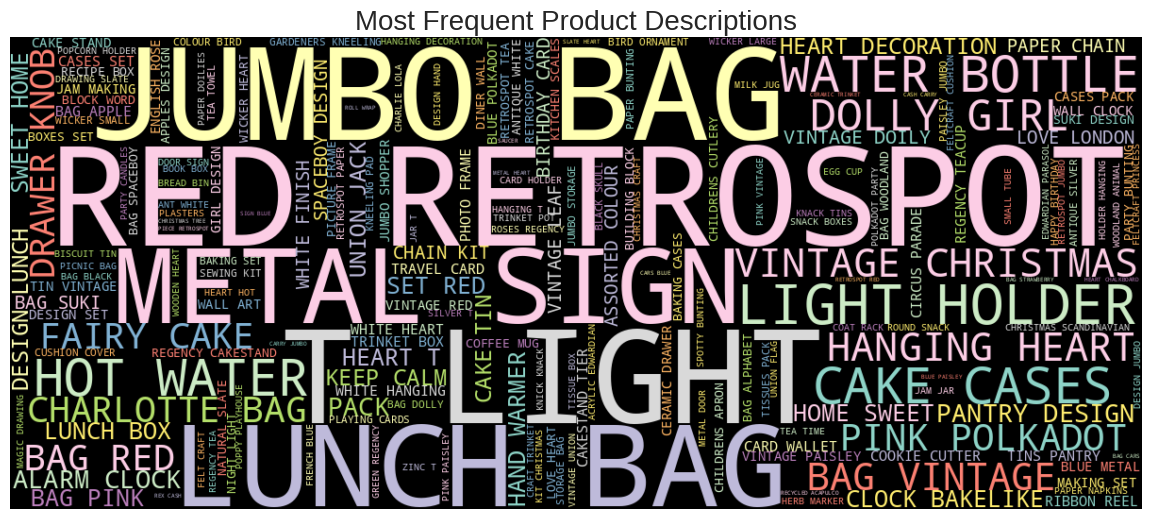

In [ ]:
# Chart - 14 visualization code

# wordcloud

text = ' '.join(df['Description'].dropna().astype(str).tolist())
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=1200, height=500, background_color='black', stopwords=stopwords, colormap='Set3').generate(text)

plt.figure(figsize=(12,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Product Descriptions', fontsize=20)
plt.tight_layout(pad=0)
plt.show()

##### 1. Why did you pick the specific chart?

A word cloud is perfect for  highlighting common patterns in textual data, i.e. how frequently specific words appear in a dataset (where there size is determined by their frequency).

##### 2. What is/are the insight(s) found from the chart?

We can see what types of products dominate the catalog by name, at instance.

Words like “Bag”, “red”, “light”, “retrospot” etc. probably pop up — giving clues about product categories and design themes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Positive Impact*
* Helps us refine our category structure — dedicated filters/tags can by implied.
* Great for search optimization — keywords can be aligned in product titles with what customers might search.
* Also helps identify overused terms that make product listings sound repetitive.

*Negative Impact*
* Too many redundant descriptions or lacks diversity in naming, can hurt conversion and discovery.
* Also, vague or generic names like “JUMBO”, etc. without context might signal weak product labeling.

#### Chart - 15 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
fig = px.imshow( correlation_matrix, text_auto=True,
    color_continuous_scale='Burg',
    title="<b>Correlation Heatmap of Numeric Features</b>", labels=dict(x="Features", y="Features", color="Correlation"),
    aspect="auto", width=900, height=600 )

fig.update_layout( title_x=0.5 )
fig.show()

##### 1. Why did you pick the specific chart?

Correlation heatmap gives a quick overview of relationships between all numeric variables, i.e., how strongly are two features related to each other.

Great for feature selection and multicollinearity check before modeling.

##### 2. What is/are the insight(s) found from the chart?

* Strong positive correlation between quantity and total price.
* Possible weak/negative correlation between UnitPrice and Quantity.
* UnitPrice and TotalPrice may show moderate correlation, but not always strong as total price is influenced more by quantity.

#### Chart - 16 - Pair Plot

In [ ]:
# Pair Plot visualization code

fig = px.scatter_matrix( df, dimensions=['Quantity', 'UnitPrice', 'Total_Price'],
    title="<b>Scatter Matrix of Numeric Features</b>", color_discrete_sequence=['#932F67'] )

fig.update_layout( width=700, height=600, title_x=0.5 )
fig.show()

##### 1. Why did you pick the specific chart?

Pair plots visualizes scatter plot between every pair of numerical features, where diagonal shows histograms.

Pair plots are perfect for spotting: clusters, correlations and trends. We can visually detect: Linearity/non-linearity, clusters, outliers and skewness.

##### 2. What is/are the insight(s) found from the chart?

* Quantity vs UnitPrice :- Scatter is extremely dense near origin, and points are scattered widely with no linear pattern (outliers), indicates that pricing isn’t dependent on quantity, and most sales involve low quantities and low prices.

* Quantity vs Total_Price :- weak positive trend can be observed, as quantity increases, total price increases.
However, there’s high variance: some low-quantity orders have high total price.

* UnitPrice vs Total_Price :- strong diagonal relationship, as total price increases linearly with UnitPrice, especially when quantity is consistent.
Extreme outliers, may be due to very high unit prices.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# already done above

#### What all missing value imputation techniques have you used and why did you use those techniques?

Listwise Deletion method -
In this method, entire rows from dataset are removed if any column (or specific important columns) has missing/null values.

We used listwise deletion because it is a simple, low-risk way to ensure clean consistent data, especially when the missing values were either : are very less in number comparatively (Description) or null values are present in unimportant columns(CustomerID).

### 2. Handling Outliers

In [ ]:
cols_outlier = ['Quantity', 'UnitPrice', 'Total_Price']

In [ ]:
df[cols_outlier].describe()

Quantity      UnitPrice    Total_Price
count  397924.000000  397924.000000  397924.000000
mean       13.021823       3.116174      22.394749
std       180.420210      22.096788     309.055588
min         1.000000       0.000000       0.000000
25%         2.000000       1.250000       4.680000
50%         6.000000       1.950000      11.800000
75%        12.000000       3.750000      19.800000
max     80995.000000    8142.750000  168469.600000

In [ ]:
# Handling Outliers & Outlier treatments

for col in cols_outlier :
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower_bound, upper_bound)

In [ ]:
df[cols_outlier].describe()

Quantity      UnitPrice    Total_Price
count  397924.000000  397924.000000  397924.000000
mean        8.317485       2.597896      14.382781
std         8.097610       2.103131      11.984713
min         1.000000       0.000000       0.000000
25%         2.000000       1.250000       4.680000
50%         6.000000       1.950000      11.800000
75%        12.000000       3.750000      19.800000
max        27.000000       7.500000      42.480000

##### What all outlier treatment techniques have you used and why did you use those techniques?

Winsorizing :-  

Capping Using the IQR Method is a technique where instead of deleting the rows or letting extreme values skew our analysis,the outliers are capped to the upper and lower bounds calculated using the Interquartile Range (IQR) method.

We use this techniquee because :-

Deleting outliers may cause loss of important business info (like high-value orders). Capping keeps the row, Keeping things simple	It’s easy to apply, doesn’t require assumptions about distribution (unlike Z-score), and works well for retail data.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# no encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

not applicable

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

In [ ]:
# rfm

ref_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                              # Frequency
    'Total_Price': 'sum'                                  # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [ ]:
rfm

CustomerID  Recency  Frequency  Monetary
0       12346.0      326          1     42.48
1       12347.0        2          7   3769.34
2       12348.0       75          4   1111.40
3       12349.0       19          1   1442.71
4       12350.0      310          1    334.40
...         ...      ...        ...       ...
4334    18280.0      278          1    180.60
4335    18281.0      181          1     80.82
4336    18282.0        8          2    178.05
4337    18283.0        4         16   2094.88
4338    18287.0       43          3   1578.50

[4339 rows x 4 columns]

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

In [ ]:
rfm.describe()

Recency    Frequency       Monetary
count  4339.000000  4339.000000    4339.000000
mean     92.518322     4.271952    1319.026023
std     100.009747     7.705493    3195.462952
min       1.000000     1.000000       0.000000
25%      18.000000     1.000000     256.655000
50%      51.000000     2.000000     586.390000
75%     142.000000     5.000000    1409.815000
max     374.000000   210.000000  114220.760000

In [ ]:
# plotting rfm for better visualisation

recency_data = rfm['Recency']
frequency_data = rfm['Frequency']
monetary_data = rfm['Monetary']

recency_trace = ff.create_distplot([recency_data], ['Recency'],show_rug=False,bin_size=10, colors=['crimson']).data[0]
frequency_trace = ff.create_distplot([frequency_data], ['Frequency'],show_rug=False,bin_size=10, colors=['crimson']).data[0]
monetary_trace = ff.create_distplot([monetary_data], ['Monetary'],show_rug=False,bin_size=10000, colors=['crimson']).data[0]

fig = make_subplots(rows=1, cols=3, shared_xaxes=False, subplot_titles=("Recency", "Frequency", "Monetary"))

fig.add_trace(recency_trace, row=1, col=1)
fig.add_trace(frequency_trace, row=1, col=2)
fig.add_trace(monetary_trace, row=1, col=3)

fig.update_layout( height=400, title_text="RFM Distribution", template='plotly_white', showlegend=False )
fig.update_traces(marker_line_width=1.2, marker_line_color='black' )

fig.update_yaxes(title_text="Density", row=1, col=1)
fig.update_yaxes(title_text="Density", row=1, col=2)
fig.update_yaxes(title_text="Density", row=1, col=3)

fig.update_xaxes(title_text="Recency", row=1, col=1)
fig.update_xaxes(title_text="Frequency", row=1, col=2)
fig.update_xaxes(title_text="Monetary", row=1, col=3)

fig.show()

##### What all feature selection methods have you used  and why?

 Domain-Driven Feature Selection :-

Domain-Driven selection method is used, focusing on RFM (Recency, Frequency, Monetary), which are proven behavioral indicators in retail analytics.

The selected features were:
* Recency – Number of days since the customer's last purchase
* Frequency – Number of purchases made by the customer
* Monetary – Total amount spent by the customer

We used this method due to following reasons :-
* Business Relevance: RFM captures customer behavior from three core angles - how recently, how often, and how much they spend.
* RFM works well for customer segmentation, retention modeling, and churn prediction without complex modeling.
* No need for correlation checks or model-based selection since these features are engineered to be mutually informative and non-redundant.

##### Which all features you found important and why?

* Recency	-> Number of days since the customer's last purchase. Lower recency means more active. Recency helps detect customers who are slipping away or likely to churn.
* Frequency ->	Tells how loyal/engaged a customer is, by counting their purchases. Frequency highlights consistentcy, potential of loyal customers.
* Monetary -> Shows customer contribution in terms of revenue generation. Monetary reveals high-value customers, can be targeted for upselling and loyalty programs.

Together, they enable customer segmentation like:
* Low R, High F, High M : Loyal and Profitable customers
* Medium R, High F, Medium M : Loyal customers
* High R, Low F, Low M : Churning customers

### 5. Data Transformation

In [ ]:
# handle neagative and zero values
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

#apply handle neg_n_zero function to recency and monetary columns

rfm['Recency'] = [handle_neg_n_zero(x) for x in rfm.Recency]
rfm['Monetary'] = [handle_neg_n_zero(x) for x in rfm.Monetary]

In [ ]:
# perform log transformations to bring data into normal or near normal distributions.

log_rfm =rfm[["Recency",'Frequency','Monetary']].apply(np.log1p,axis=1).round(3)

In [ ]:
# plotting log_rfm for better visualisation

recency_data = log_rfm['Recency']
frequency_data = log_rfm['Frequency']
monetary_data = log_rfm['Monetary']

recency_trace = ff.create_distplot([recency_data], ['Recency'],show_rug=False, colors=['crimson']).data[0]
frequency_trace = ff.create_distplot([frequency_data], ['Frequency'],show_rug=False, colors=['crimson']).data[0]
monetary_trace = ff.create_distplot([monetary_data], ['Monetary'],show_rug=False, colors=['crimson']).data[0]

fig = make_subplots(rows=1, cols=3, shared_xaxes=False, subplot_titles=("Recency", "Frequency", "Monetary"))

fig.add_trace(recency_trace, row=1, col=1)
fig.add_trace(frequency_trace, row=1, col=2)
fig.add_trace(monetary_trace, row=1, col=3)

fig.update_layout( height=400, title_text="RFM Distribution", template='plotly_white', showlegend=False )
fig.update_traces(marker_line_width=1.2, marker_line_color='black' )

fig.update_yaxes(title_text="Density", row=1, col=1)
fig.update_yaxes(title_text="Density", row=1, col=2)
fig.update_yaxes(title_text="Density", row=1, col=3)

fig.update_xaxes(title_text="Recency", row=1, col=1)
fig.update_xaxes(title_text="Frequency", row=1, col=2)
fig.update_xaxes(title_text="Monetary", row=1, col=3)

fig.show()

In [ ]:
# adding Recency_log, Frequency_log	and Monetary_log columns to rfm

rfm['Recency_log'] = rfm['Recency'].apply(np.log1p)
rfm['Frequency_log'] = rfm['Frequency'].apply(np.log1p)
rfm['Monetary_log'] = rfm['Monetary'].apply(np.log1p)

In [ ]:
rfm

CustomerID  Recency  Frequency  Monetary  Recency_log  Frequency_log  \
0       12346.0      326          1     42.48     5.789960       0.693147   
1       12347.0        2          7   3769.34     1.098612       2.079442   
2       12348.0       75          4   1111.40     4.330733       1.609438   
3       12349.0       19          1   1442.71     2.995732       0.693147   
4       12350.0      310          1    334.40     5.739793       0.693147   
...         ...      ...        ...       ...          ...            ...   
4334    18280.0      278          1    180.60     5.631212       0.693147   
4335    18281.0      181          1     80.82     5.204007       0.693147   
4336    18282.0        8          2    178.05     2.197225       1.098612   
4337    18283.0        4         16   2094.88     1.609438       2.833213   
4338    18287.0       43          3   1578.50     3.784190       1.386294   

      Monetary_log  
0         3.772301  
1         8.234920  
2         7.014275  
3         7.274971  
4         5.815324  
...            ...  
4334      5.201806  
4335      4.404522  
4336      5.187665  
4337      7.647729  
4338      7.364864  

[4339 rows x 7 columns]

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, data transformation is necessary, as original recency, frequency, and monetary values are heavily right-skewed. This skew is common in e-commerce data as - some customers buy a lot more than others, a few customers buy very frequently and customers purchase only once.

Skewed data affects algorithms like KMeans, hierarchical clustering, and even distance-based methods (e.g., Euclidean). Unscaled or skewed values may dominate results, leading to poor clusters.


Log transformation has been used (  np.log1p() (log(x + 1)) ), as it reduces skewness, compresses large values and stretches small values- creating a more uniform distribution, helps handle zero values safely (since log(0) is undefined) and log1p() is numerically more stable for small values.


### 6. Data Scaling

In [ ]:
# Scaling your data

scaler = StandardScaler()

##### Which method have you used to scale you data and why?

 StandardScaler :-   
 StandardScaler standardizes features by removing the mean and scaling to unit variance

### 7. Dimesionality Reduction

In [ ]:
# DImensionality Reduction (If needed)

##### Do you think that dimensionality reduction is needed? Explain Why?

No dimensionality reduction needed, as already limited number of columns are present

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Not applicable

### 8. Data Splitting

In [ ]:
# Split your data into four segment using quantile.

quantile = rfm[['Recency_log', 'Frequency_log', 'Monetary_log']].quantile(q=[0.25, 0.5, 0.75])
quantile = quantile.to_dict()
quantile

{'Recency_log': {0.25: 2.9444389791664403,
  0.5: 3.9512437185814275,
  0.75: 4.962844630259907},
 'Frequency_log': {0.25: 0.6931471805599453,
  0.5: 1.0986122886681096,
  0.75: 1.791759469228055},
 'Monetary_log': {0.25: 5.551618990583492,
  0.5: 6.375688994445279,
  0.75: 7.251921254244852}}

In [ ]:
# converting quantiles to a dictionary
# functions to create R,F,M segments
# arguments (x=value,p=recency,monetary_value,frequency,d=quantiles dict)
# lower the recency,good for the company.

def R_score(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

# higher the frequency and monetary lead to a good consumer. here, higher value=1 in reverse way.
def FM_score(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
# calculating and adding R,F and M segments values columns in the missing dataset to show R,F,M segment value

rfm['R'] = rfm['Recency_log'].apply(R_score, args=('Recency_log',quantile))
rfm['F'] = rfm['Frequency_log'].apply(FM_score, args=('Frequency_log',quantile))
rfm['M'] = rfm['Monetary_log'].apply(FM_score, args=('Monetary_log',quantile))
rfm.head()

CustomerID  Recency  Frequency  Monetary  Recency_log  Frequency_log  \
0    12346.0      326          1     42.48     5.789960       0.693147   
1    12347.0        2          7   3769.34     1.098612       2.079442   
2    12348.0       75          4   1111.40     4.330733       1.609438   
3    12349.0       19          1   1442.71     2.995732       0.693147   
4    12350.0      310          1    334.40     5.739793       0.693147   

   Monetary_log  R  F  M  
0      3.772301  4  4  4  
1      8.234920  1  1  1  
2      7.014275  3  2  2  
3      7.274971  2  4  1  
4      5.815324  4  4  3

In [ ]:
# add a new column to combine rfm score

rfm['RFM_group'] = rfm.R.map(str) + rfm.F.map(str) + rfm.M.map(str)

In [ ]:
# calculate and add rfmScore value column sowing total sum of RFMgroup values

rfm["RFM_Score"] = rfm[['R','F','M']].sum(axis=1)

In [ ]:
rfm.head()

CustomerID  Recency  Frequency  Monetary  Recency_log  Frequency_log  \
0    12346.0      326          1     42.48     5.789960       0.693147   
1    12347.0        2          7   3769.34     1.098612       2.079442   
2    12348.0       75          4   1111.40     4.330733       1.609438   
3    12349.0       19          1   1442.71     2.995732       0.693147   
4    12350.0      310          1    334.40     5.739793       0.693147   

   Monetary_log  R  F  M RFM_group  RFM_Score  
0      3.772301  4  4  4       444         12  
1      8.234920  1  1  1       111          3  
2      7.014275  3  2  2       322          7  
3      7.274971  2  4  1       241          7  
4      5.815324  4  4  3       443         11

In [ ]:
# assign loyality level to each customer.

loyality_level=["Platinum",'Gold','Silver','Bronze']
score_cut = pd.qcut(rfm["RFM_Score"],q=4,labels=loyality_level)
rfm['RFM_Loyality_level'] = score_cut.values
rfm.reset_index().head()

index CustomerID  Recency  Frequency  Monetary  Recency_log  Frequency_log  \
0      0    12346.0      326          1     42.48     5.789960       0.693147   
1      1    12347.0        2          7   3769.34     1.098612       2.079442   
2      2    12348.0       75          4   1111.40     4.330733       1.609438   
3      3    12349.0       19          1   1442.71     2.995732       0.693147   
4      4    12350.0      310          1    334.40     5.739793       0.693147   

   Monetary_log  R  F  M RFM_group  RFM_Score RFM_Loyality_level  
0      3.772301  4  4  4       444         12             Bronze  
1      8.234920  1  1  1       111          3           Platinum  
2      7.014275  3  2  2       322          7               Gold  
3      7.274971  2  4  1       241          7               Gold  
4      5.815324  4  4  3       443         11             Bronze

In [ ]:
# validate the data for RFM group.

rfm[rfm['RFM_group']=='111'].sort_values('Monetary_log',ascending=False).reset_index().head(10)

index CustomerID  Recency  Frequency   Monetary  Recency_log  \
0   1880    14911.0        1        201  114220.76     0.693147   
1   1690    14646.0        2         74   77348.14     1.098612   
2   1290    14096.0        4         17   49360.20     1.609438   
3    562    13089.0        3         97   43398.99     1.386294   
4   1435    14298.0        8         44   41170.43     2.197225   
5   4011    17841.0        2        124   38342.02     1.098612   
6   1334    14156.0       10         55   37033.96     2.397895   
7   3772    17511.0        3         31   34138.43     1.386294   
8   2177    15311.0        1         91   30829.74     0.693147   
9    326    12748.0        1        210   28013.98     0.693147   

   Frequency_log  Monetary_log  R  F  M RFM_group  RFM_Score  \
0       5.308268     11.645897  1  1  1       111          3   
1       4.317488     11.256085  1  1  1       111          3   
2       2.890372     10.806920  1  1  1       111          3   
3       4.584967     10.678214  1  1  1       111          3   
4       3.806662     10.625500  1  1  1       111          3   
5       4.828314     10.554328  1  1  1       111          3   
6       4.025352     10.519618  1  1  1       111          3   
7       3.465736     10.438208  1  1  1       111          3   
8       4.521789     10.336268  1  1  1       111          3   
9       5.351858     10.240495  1  1  1       111          3   

  RFM_Loyality_level  
0           Platinum  
1           Platinum  
2           Platinum  
3           Platinum  
4           Platinum  
5           Platinum  
6           Platinum  
7           Platinum  
8           Platinum  
9           Platinum

In [ ]:
rfm.head()

CustomerID  Recency  Frequency  Monetary  Recency_log  Frequency_log  \
0    12346.0      326          1     42.48     5.789960       0.693147   
1    12347.0        2          7   3769.34     1.098612       2.079442   
2    12348.0       75          4   1111.40     4.330733       1.609438   
3    12349.0       19          1   1442.71     2.995732       0.693147   
4    12350.0      310          1    334.40     5.739793       0.693147   

   Monetary_log  R  F  M RFM_group  RFM_Score RFM_Loyality_level  
0      3.772301  4  4  4       444         12             Bronze  
1      8.234920  1  1  1       111          3           Platinum  
2      7.014275  3  2  2       322          7               Gold  
3      7.274971  2  4  1       241          7               Gold  
4      5.815324  4  4  3       443         11             Bronze

In [ ]:
# target peoples

rfm[rfm["RFM_Loyality_level"]=="Platinum"].sort_values("Monetary_log",ascending=False).reset_index().head(10)

index CustomerID  Recency  Frequency   Monetary  Recency_log  \
0   1880    14911.0        1        201  114220.76     0.693147   
1   1690    14646.0        2         74   77348.14     1.098612   
2   1290    14096.0        4         17   49360.20     1.609438   
3    562    13089.0        3         97   43398.99     1.386294   
4   1435    14298.0        8         44   41170.43     2.197225   
5   4011    17841.0        2        124   38342.02     1.098612   
6   1334    14156.0       10         55   37033.96     2.397895   
7   3772    17511.0        3         31   34138.43     1.386294   
8   2177    15311.0        1         91   30829.74     0.693147   
9    326    12748.0        1        210   28013.98     0.693147   

   Frequency_log  Monetary_log  R  F  M RFM_group  RFM_Score  \
0       5.308268     11.645897  1  1  1       111          3   
1       4.317488     11.256085  1  1  1       111          3   
2       2.890372     10.806920  1  1  1       111          3   
3       4.584967     10.678214  1  1  1       111          3   
4       3.806662     10.625500  1  1  1       111          3   
5       4.828314     10.554328  1  1  1       111          3   
6       4.025352     10.519618  1  1  1       111          3   
7       3.465736     10.438208  1  1  1       111          3   
8       4.521789     10.336268  1  1  1       111          3   
9       5.351858     10.240495  1  1  1       111          3   

  RFM_Loyality_level  
0           Platinum  
1           Platinum  
2           Platinum  
3           Platinum  
4           Platinum  
5           Platinum  
6           Platinum  
7           Platinum  
8           Platinum  
9           Platinum

In [ ]:
# segmentating customers based on rfm

segmentation_based_on_rfm = rfm[["Recency_log",'Frequency_log','Monetary_log','RFM_Loyality_level']]
segmentation_based_on_rfm.groupby('RFM_Loyality_level').agg({
    'Recency_log': ['mean','min','max'],
    'Frequency_log': ['mean','min','max'],
    'Monetary_log': ['mean','min','max', 'count']})


Recency_log                     Frequency_log            \
                          mean       min       max          mean       min   
RFM_Loyality_level                                                           
Platinum              2.502030  0.693147  4.912655      2.191611  1.098612   
Gold                  3.679505  0.693147  5.921578      1.353406  0.693147   
Silver                4.253823  0.693147  5.921578      0.892616  0.693147   
Bronze                5.294416  3.970292  5.926926      0.719194  0.693147   

                             Monetary_log                             
                         max         mean       min        max count  
RFM_Loyality_level                                                    
Platinum            5.351858     7.767030  5.632430  11.645897  1189  
Gold                3.555348     6.585505  3.625940   8.547272  1264  
Silver              1.945910     5.745483  0.693147   7.634758   952  
Bronze              1.098612     5.086088  1.558145   6.354405   934

##### What data splitting ratio have you used and why?

Type of Splitting Used:

Quantile-based splitting (25%, 50%, 75%) is used to categorize each customer into 4 segments for each R, F, and M metric:
* Recency (R): Lower recency means the customer purchased more recently (better).

  So customers are scored: <= 25% ➝ 1, <= 50% ➝ 2, <= 75% ➝ 3, > 75% ➝ 4.

* Frequency (F) and Monetary (M):

  Higher is better → more purchases or higher spend.

  So customers are scored in reverse: <= 25% ➝ 4, <= 50% ➝ 3, <= 75% ➝ 2, > 75% ➝ 1.

### 9. Handling Imbalanced Dataset

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### Do you think the dataset is imbalanced? Explain Why.

No handling of dataset required as it done in classification model where target variable is imbalanced. No such thing in clustering.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Not applicable

## ***6. ML Model Implementation***

### ML Model - 1

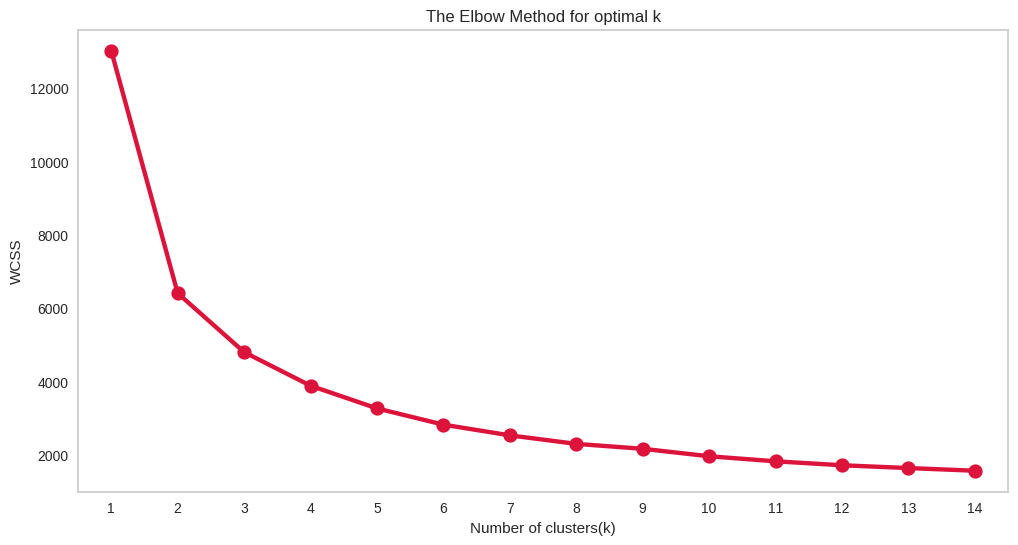

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# applying elbow method on recency,frequency and monetary.

recency_and_monetary_feat = ["Recency_log","Frequency_log","Monetary_log"]
X = rfm[recency_and_monetary_feat].values
X = scaler.fit_transform(X)

wcss ={}
for k in range(1,15):
    km = KMeans(n_clusters=k,init='k-means++',max_iter=1000)
    km = km.fit(X)
    wcss[k] = km.inertia_

# Plot the graph for the sum of square distance values and number of clusters
plt.figure(figsize=(12,6))
sns.pointplot(x=list(wcss.keys()),y=list(wcss.values()),color='crimson')
plt.title("The Elbow Method for optimal k")
plt.xlabel("Number of clusters(k)")
plt.ylabel("WCSS")
plt.grid(False)
plt.show()

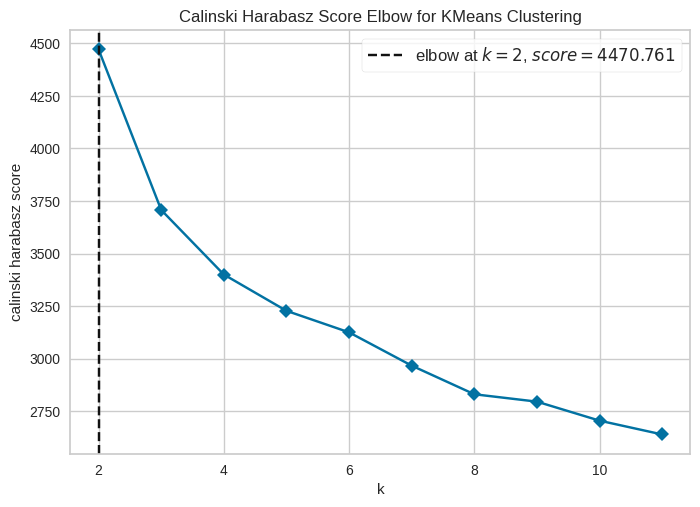

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
# Instantiate the clustering model and visualiser.

model = KMeans()
visualizer = KElbowVisualizer(model,k=(2,12),metric="calinski_harabasz",timings=False)
visualizer.fit(X)
visualizer.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

K-Means clustering :

K-Means clustering is an algorithm designed to group unlabeled data into clusters based on similarity. It is particularly effective for tasks like customer segmentation, image compression, and anomaly detection. The algorithm iteratively assigns data points to clusters and updates cluster centroids until convergence.

In [ ]:
# Visualizing evaluation Metric Score chart

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with the number of expected clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    # Silhouette coefficient score
    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.43318365715271523)
For n_clusters = 3, silhouette score is 0.3396919192439099)
For n_clusters = 4, silhouette score is 0.33228466912457394)
For n_clusters = 5, silhouette score is 0.31172969963446895)
For n_clusters = 6, silhouette score is 0.31052869573576)
For n_clusters = 7, silhouette score is 0.3041745367167802)
For n_clusters = 8, silhouette score is 0.28372356988238406)
For n_clusters = 9, silhouette score is 0.2838848075506398)
For n_clusters = 10, silhouette score is 0.27917482487367495)


#### 2. Cross- Validation & Hyperparameter Tuning

For n_clusters = 2 The average silhouette_score is : 0.43318365715271523


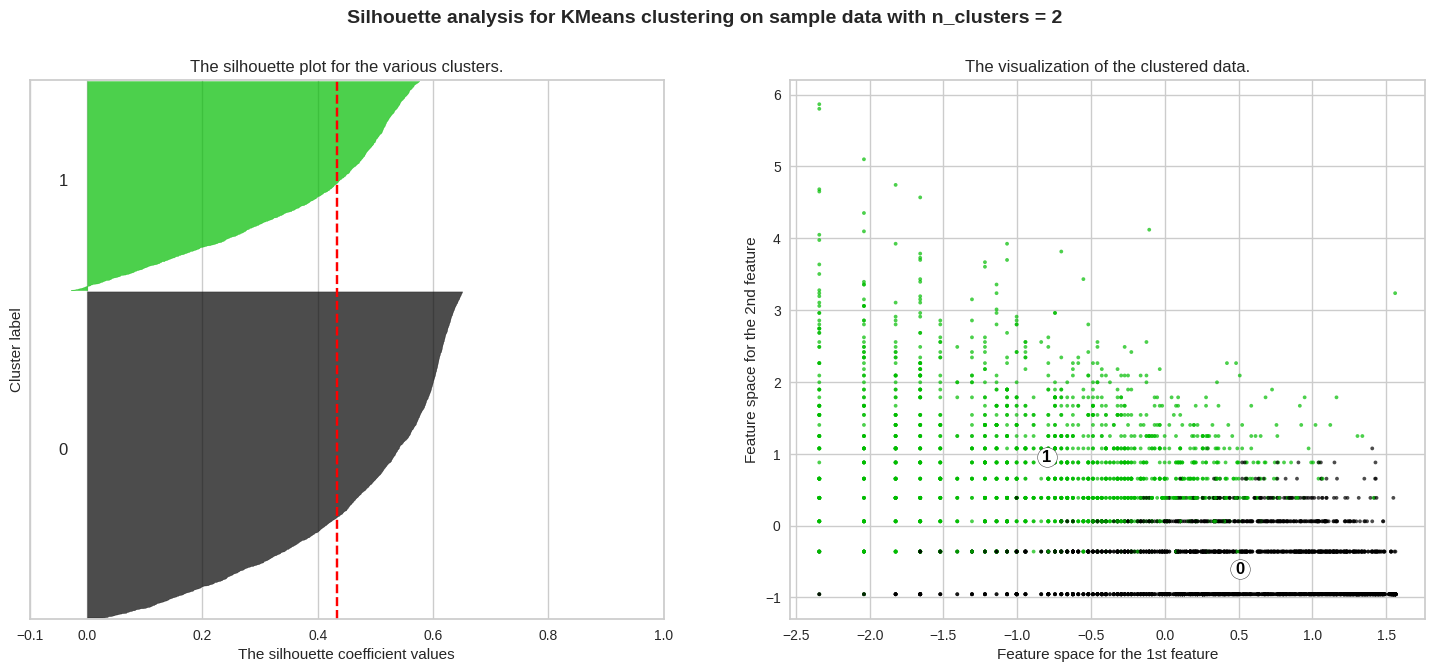

For n_clusters = 3 The average silhouette_score is : 0.3396919192439099


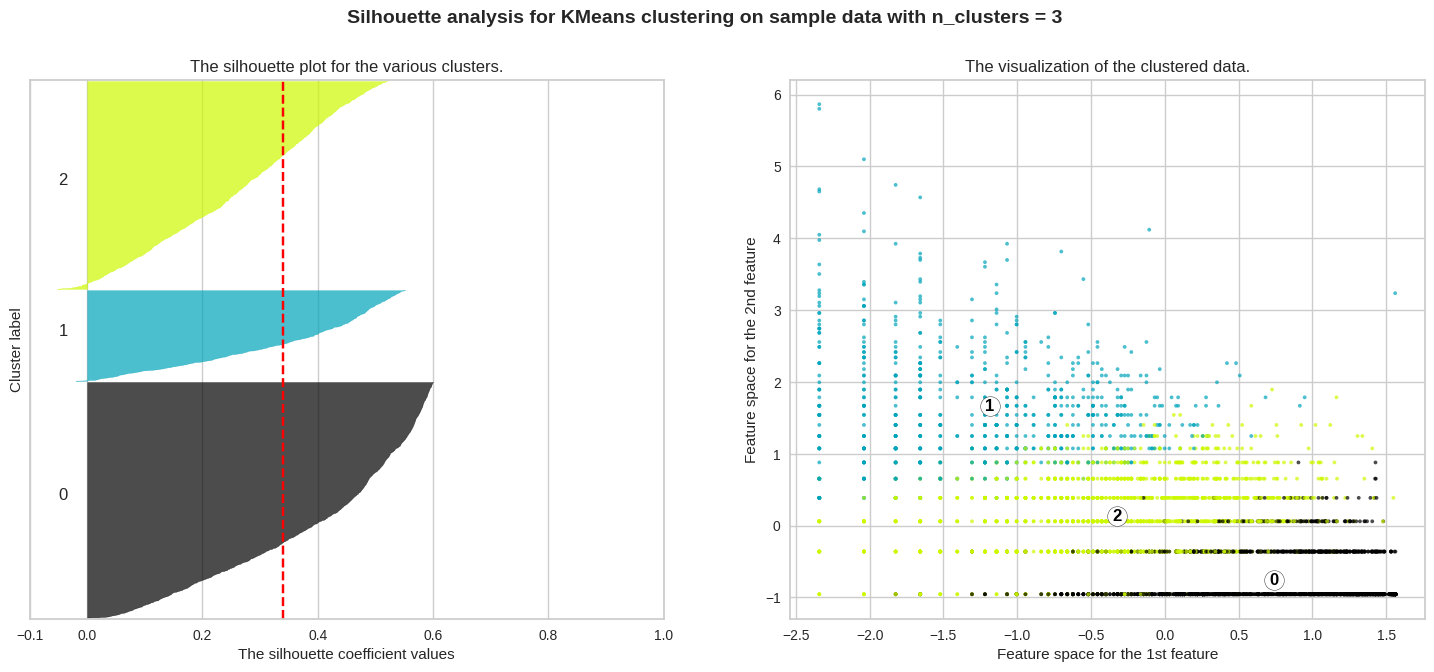

For n_clusters = 4 The average silhouette_score is : 0.33228466912457394


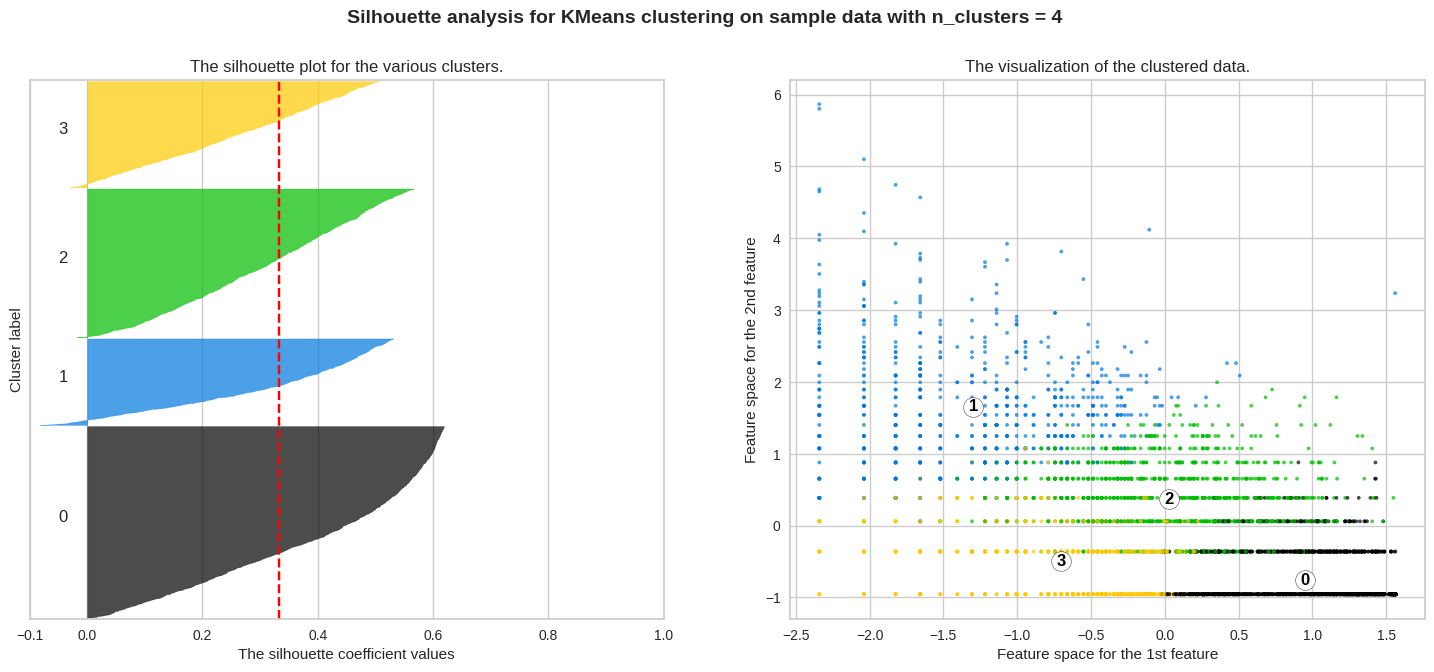

For n_clusters = 5 The average silhouette_score is : 0.31172969963446895


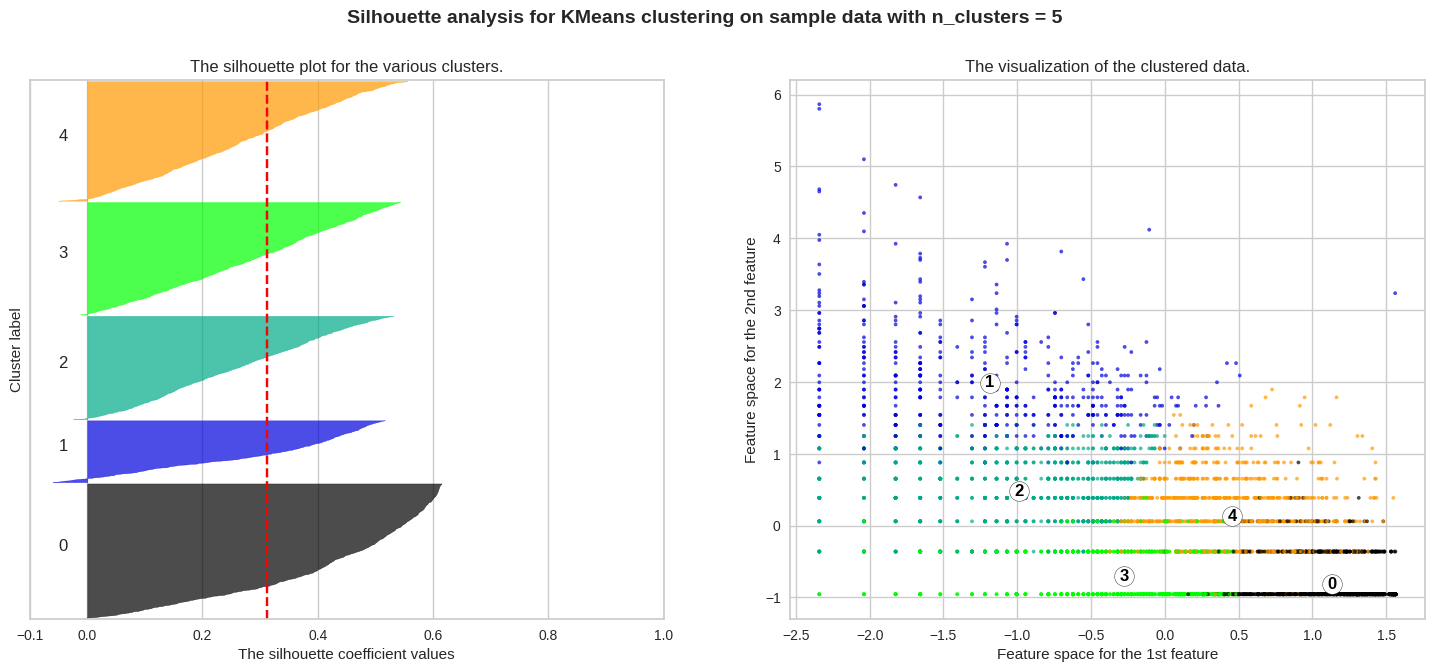

For n_clusters = 6 The average silhouette_score is : 0.31052869573576


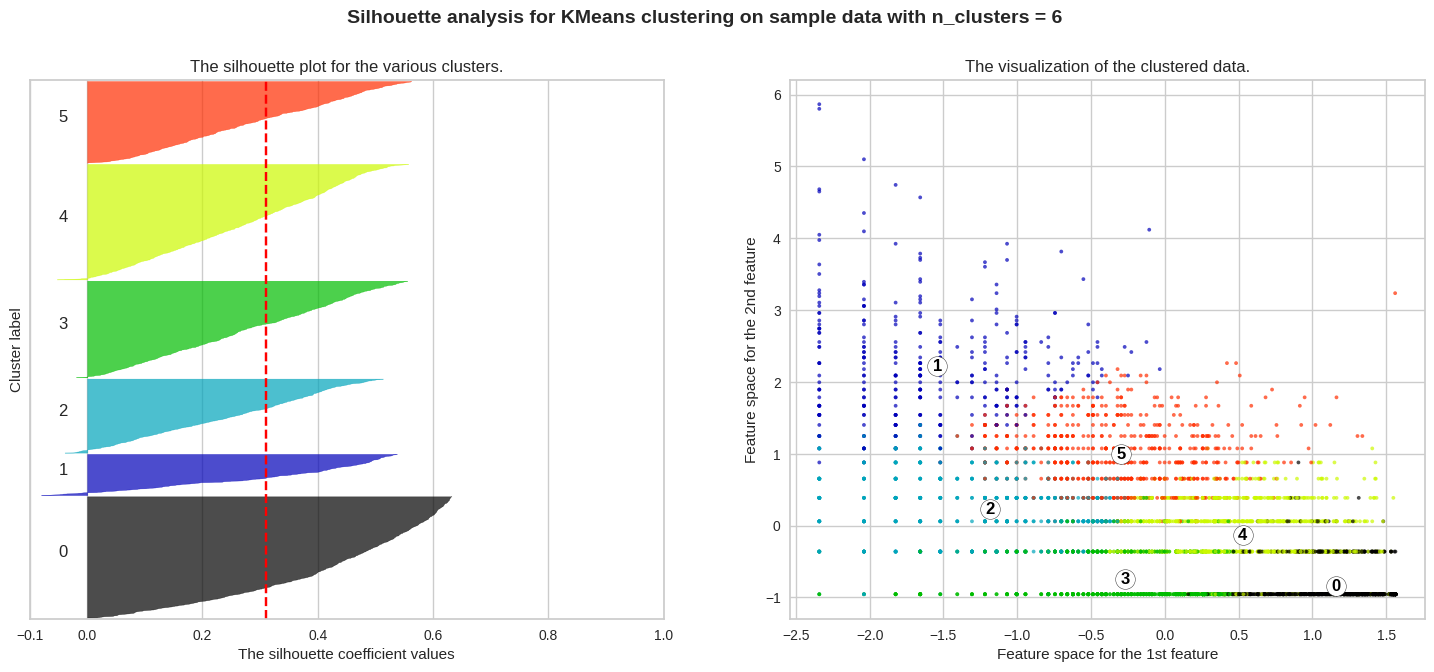

For n_clusters = 7 The average silhouette_score is : 0.3041745367167802


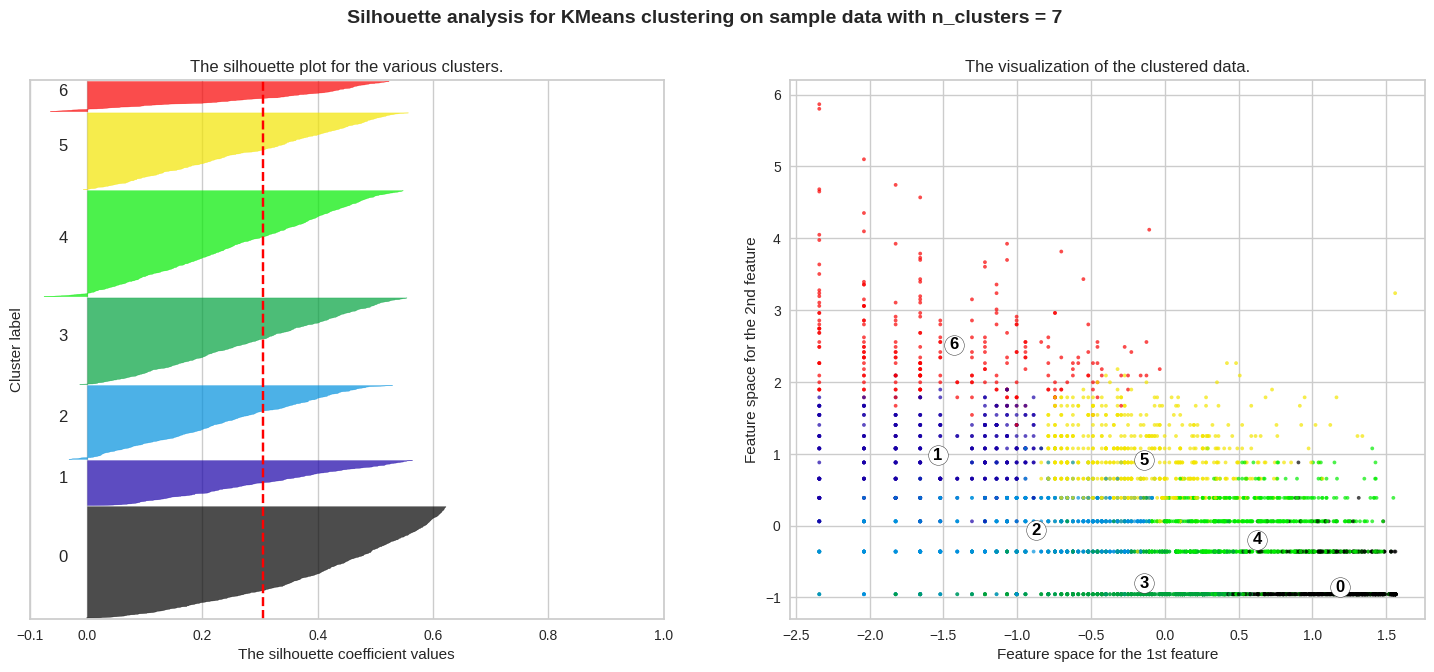

For n_clusters = 8 The average silhouette_score is : 0.28372356988238406


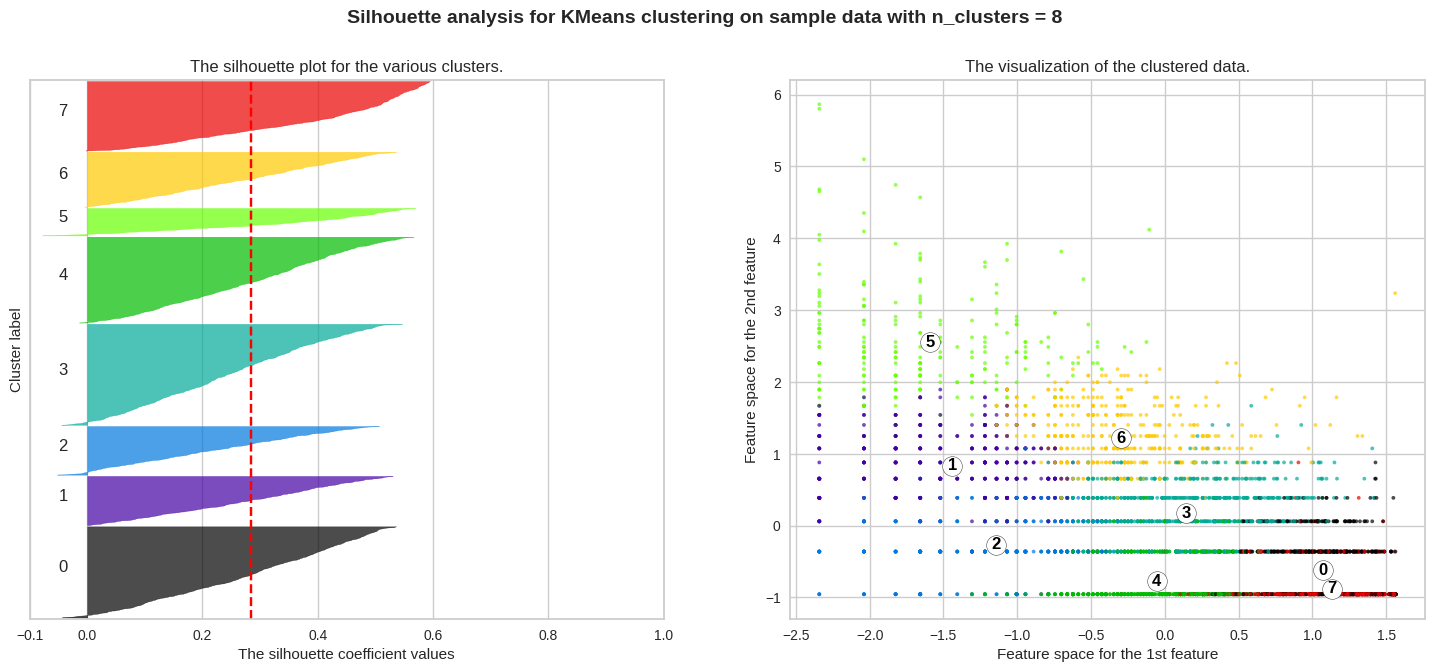

For n_clusters = 9 The average silhouette_score is : 0.2838848075506398


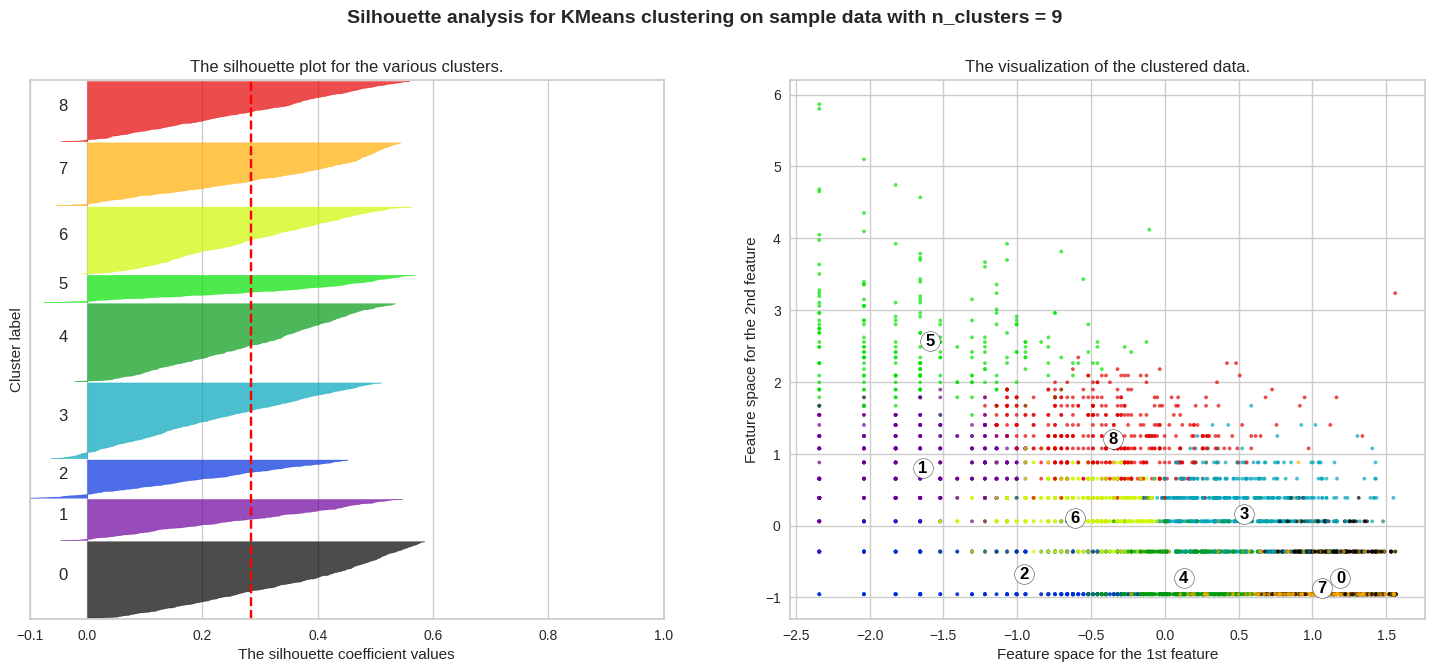

For n_clusters = 10 The average silhouette_score is : 0.27917482487367495


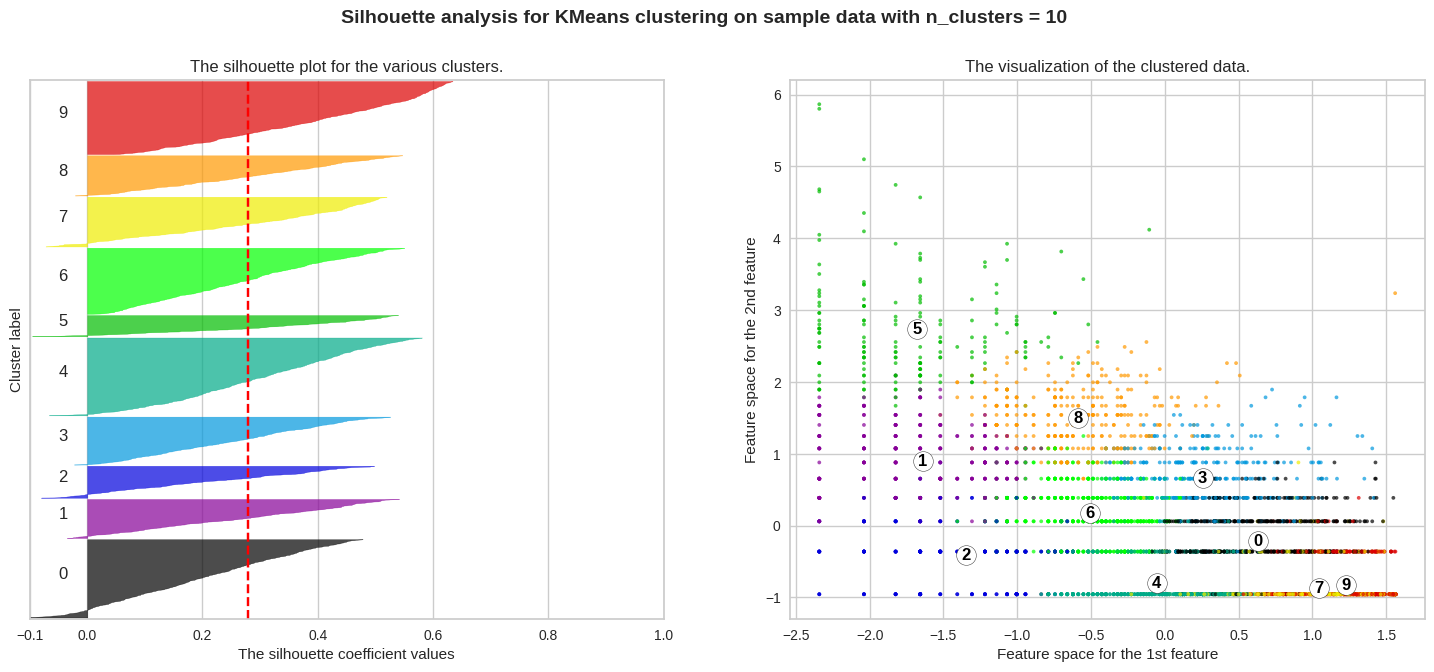

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques

# Fit the Algorithm

# Predict on the model
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # the 1st subplot is the silhouette plot
    # the silhouette coefficient can range from -1,1 but in this example all
    # lie within [0,-1,1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # the silhouette_score gives the average value for all the samples.
    # this gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
      # aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values =  sample_silhouette_values[cluster_labels == i]
      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # label the silhouette plots with their clusters numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.text(c[0], c[1], str(i), fontsize=12, fontweight='bold', ha='center', va='center', color='black')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()


In [ ]:
# applying Kmeans_clustering algorithm

kmeans_freq_mon_rec = KMeans(n_clusters=2)
kmeans_freq_mon_rec.fit(X)
y_kmeans = kmeans_freq_mon_rec.predict(X)

In [ ]:
# find the clusters for the observation given in the dataset.

rfm['cluster_based_freq_mon_rec'] = kmeans_freq_mon_rec.labels_
rfm.head(10)

CustomerID  Recency  Frequency  Monetary  Recency_log  Frequency_log  \
0    12346.0      326          1     42.48     5.789960       0.693147   
1    12347.0        2          7   3769.34     1.098612       2.079442   
2    12348.0       75          4   1111.40     4.330733       1.609438   
3    12349.0       19          1   1442.71     2.995732       0.693147   
4    12350.0      310          1    334.40     5.739793       0.693147   
5    12352.0       36          8   1718.14     3.610918       2.197225   
6    12353.0      204          1     89.00     5.323010       0.693147   
7    12354.0      232          1   1056.20     5.451038       0.693147   
8    12355.0      214          1    349.36     5.370638       0.693147   
9    12356.0       23          3   1813.41     3.178054       1.386294   

   Monetary_log  R  F  M RFM_group  RFM_Score RFM_Loyality_level  \
0      3.772301  4  4  4       444         12             Bronze   
1      8.234920  1  1  1       111          3           Platinum   
2      7.014275  3  2  2       322          7               Gold   
3      7.274971  2  4  1       241          7               Gold   
4      5.815324  4  4  3       443         11             Bronze   
5      7.449579  2  1  1       211          4           Platinum   
6      4.499810  4  4  4       444         12             Bronze   
7      6.963379  4  4  2       442         10             Silver   
8      5.858961  4  4  3       443         11             Bronze   
9      7.503516  2  2  1       221          5           Platinum   

   cluster_based_freq_mon_rec  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  
5                           1  
6                           0  
7                           0  
8                           0  
9                           1

In [ ]:
# centers of the clusters(coordinates)

centers = kmeans_freq_mon_rec.cluster_centers_
centers

array([[ 0.51184053, -0.6099237 , -0.58500197],
       [-0.79841083,  0.951409  ,  0.91253404]])

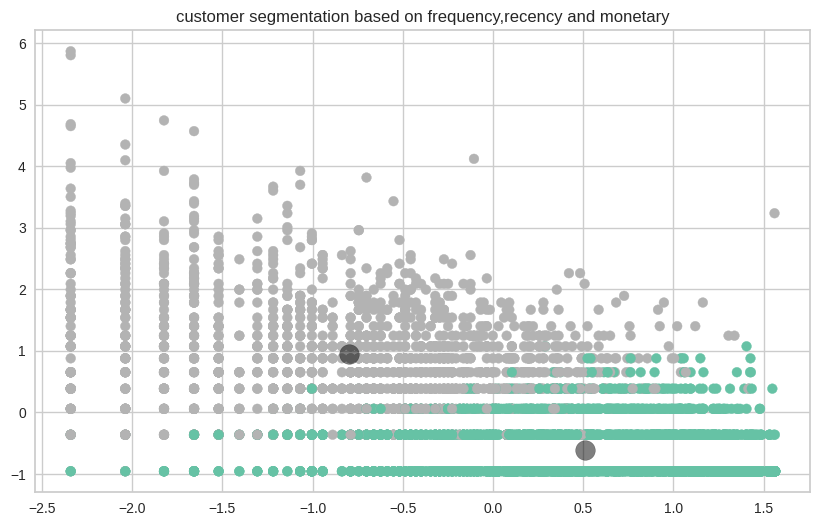

In [ ]:
# plotting visualizing the clusters

plt.figure(figsize=(10,6))
plt.title('customer segmentation based on frequency,recency and monetary')
plt.scatter(X[:,0],X[:,1],c=y_kmeans,cmap='Set2')

centers = kmeans_freq_mon_rec.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Technique Used is ,Elbow Method + Silhouette Score Analysis.

We used this technique because KMeans requires the number of clusters k to be defined beforehand. So, to determine the optimal k, we used:

* Elbow Method: Evaluated WCSS (Within-Cluster Sum of Squares) across k = 1 to 15. The "elbow point" where WCSS stops decreasing significantly gives an optimal number of clusters.
* Silhouette Score: Measures cohesion and separation of clusters. Higher scores = well-separated, tight clusters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes! Hyperparameter tuning clearly improved clustering quality. The tuning process, combining Elbow Method, Silhouette Score, and Calinski-Harabasz Index, successfully improved the clustering quality of the KMeans model.

The best performance was achieved at k = 2, with a Silhouette Score of 0.433, indicating meaningful and business-relevant segments.

### ML Model - 2

In [ ]:
# eps value is the radius value for the datapoint from which circle is drawn and min sample indicates how many datapoints should be consider that point in cluster.
db = DBSCAN(eps=0.3,min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 7
Estimated number of noise points: 435
Silhouette Coefficient: 0.006


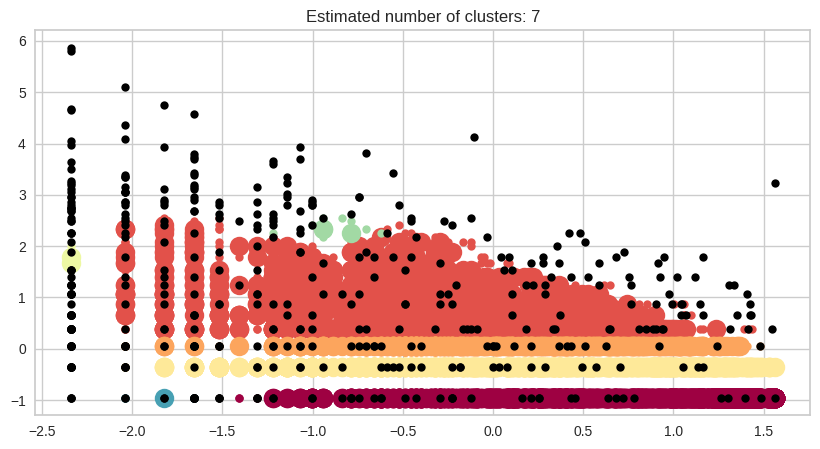

In [ ]:
# black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(10,5))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0,0,0,1]
    class_member_mask = labels == k
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor=tuple(col),markeredgecolor='k',markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor=tuple(col),markeredgecolor='k',markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

DBSCAN :
DBSCAN groups together closely packed points (points with many nearby neighbors) and marks points that lie alone in low-density regions as outliers/noise.

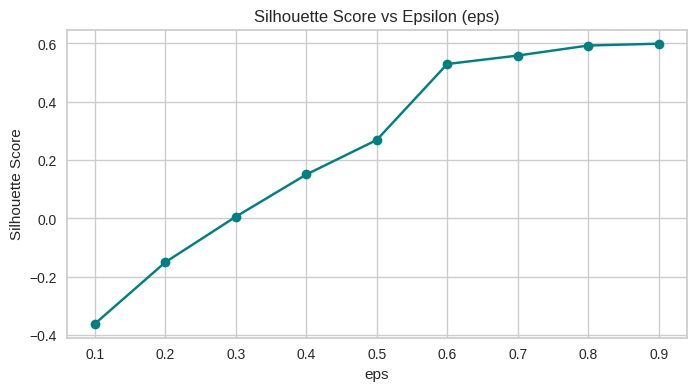

In [ ]:
# Visualizing evaluation Metric Score chart

eps_values = np.arange(0.1, 1.0, 0.1)
scores = []

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=10).fit(X)
    labels = db.labels_
    if len(set(labels)) > 1:
        score = silhouette_score(X, labels)
        scores.append(score)
    else:
        scores.append(-1)

plt.figure(figsize=(8,4))
plt.plot(eps_values, scores, marker='o', color='teal')
plt.title("Silhouette Score vs Epsilon (eps)")
plt.xlabel("eps")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques

# Fit the Algorithm

# Predict on the model

best_score = -1
best_params = {}
best_n_clusters = 0

for eps in np.arange(0.1, 1.0, 0.1):
    for min_samples in [3, 5, 7, 10]:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X)

        # Skip if all are noise or only one cluster formed
        if len(set(labels)) <= 1 or len(set(labels)) == len(X):
            continue

        score = silhouette_score(X, labels)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        print(f"eps={eps:.1f}, min_samples={min_samples}, clusters={n_clusters}, score={score:.3f}")

        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters  # this now updates correctly!

print(f"Best Silhouette Score = {best_score:.3f}")
print(f"Number of Clusters = {best_n_clusters}")

eps=0.1, min_samples=3, clusters=179, score=-0.340
eps=0.1, min_samples=5, clusters=72, score=-0.433
eps=0.1, min_samples=7, clusters=34, score=-0.449
eps=0.1, min_samples=10, clusters=29, score=-0.361
eps=0.2, min_samples=3, clusters=67, score=-0.214
eps=0.2, min_samples=5, clusters=27, score=-0.105
eps=0.2, min_samples=7, clusters=20, score=-0.251
eps=0.2, min_samples=10, clusters=16, score=-0.150
eps=0.3, min_samples=3, clusters=16, score=-0.059
eps=0.3, min_samples=5, clusters=9, score=0.019
eps=0.3, min_samples=7, clusters=8, score=0.028
eps=0.3, min_samples=10, clusters=7, score=0.006
eps=0.4, min_samples=3, clusters=7, score=0.083
eps=0.4, min_samples=5, clusters=4, score=0.098
eps=0.4, min_samples=7, clusters=3, score=0.153
eps=0.4, min_samples=10, clusters=3, score=0.151
eps=0.5, min_samples=3, clusters=3, score=0.249
eps=0.5, min_samples=5, clusters=2, score=0.271
eps=0.5, min_samples=7, clusters=2, score=0.272
eps=0.5, min_samples=10, clusters=2, score=0.269
eps=0.6, min_sam

##### Which hyperparameter optimization technique have you used and why?

For optimizing the DBSCAN model, I used Grid Search over a manually defined parameter grid of:
* eps: from 0.1 to 0.9 in steps of 0.1
* min_samples: {3, 5, 7, 10}

This approach is simple yet effective for unsupervised models like DBSCAN where: No labels are available (so traditional CV is not feasible), And the goal is to evaluate how well the clusters are formed.

The evaluation metric used was the Silhouette Score, which helps determine how well-defined and distinct the clusters are. It's a reliable metric for unsupervised clustering, indicating both cohesion and separation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After Tuning (Best Config Found):
* eps = 0.9, min_samples = 10
* Estimated clusters: 1 (but practically not meaningful for clustering)
* Silhouette Score: 0.599 (highly misleading because only one cluster)

Therefore, we are discarding the 1-cluster scenario for meaningful segmentation.

Best Valid Clustering (with more than one cluster): eps = 0.5, min_samples = 7
Clusters formed: 2
Silhouette Score: 0.272

### ML Model - 3

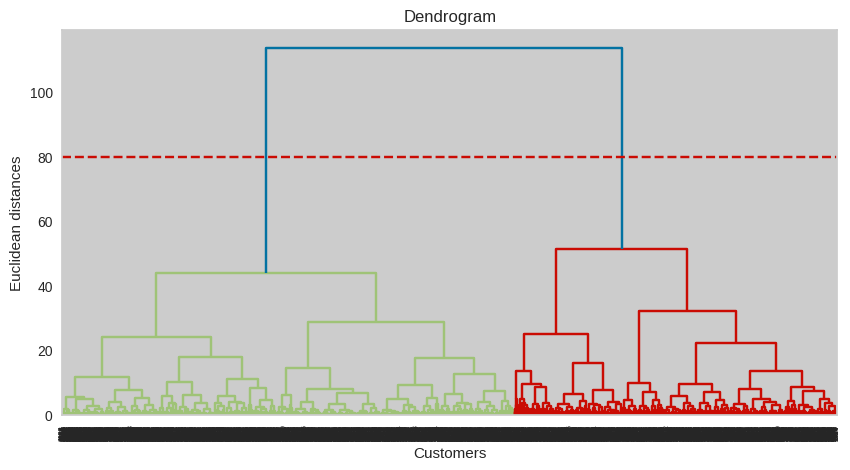

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

plt.figure(figsize=(10,5))
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.axhline(y=80,color='r',linestyle='--')
plt.show()

In [ ]:
# fitting the model

h_clustering = AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
y_hc = h_clustering.fit_predict(X)

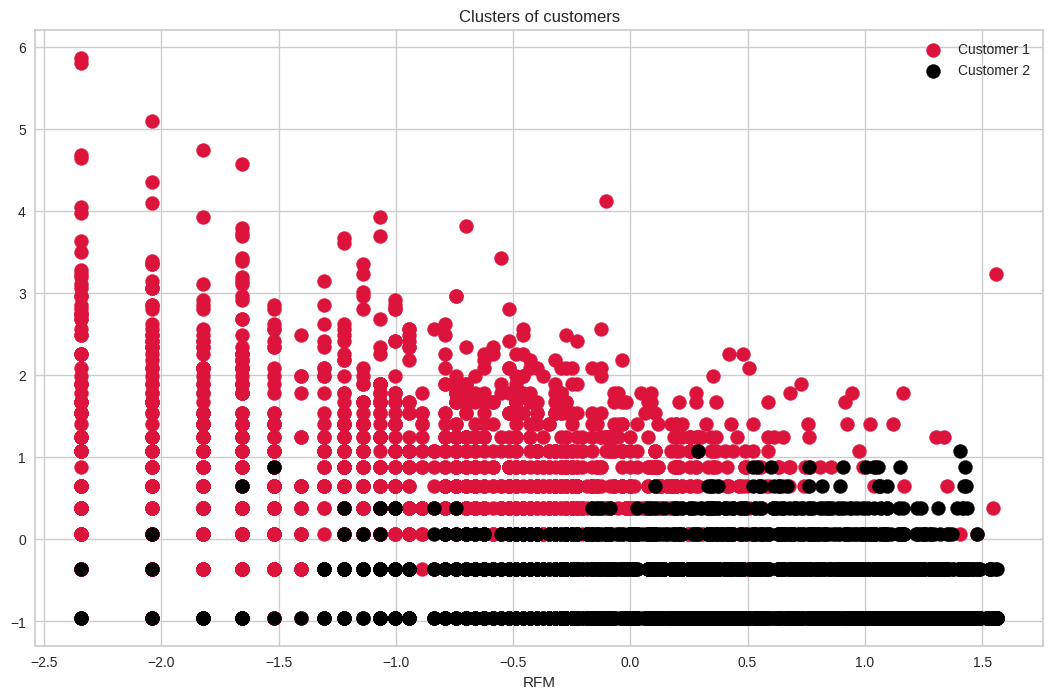

In [ ]:
# visualising the clusters ( two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='crimson',label='Customer 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='black',label='Customer 2')

plt.title("Clusters of customers")
plt.xlabel("RFM")
plt.legend()
plt.show()

In [ ]:
data_process_normalized=rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Recency_log',
                                'Frequency_log', 'Monetary_log','RFM_Loyality_level','cluster_based_freq_mon_rec']]

data_process_normalized.groupby('cluster_based_freq_mon_rec').agg({
    'Recency': ['mean','min','max'],
    'Frequency': ['mean','min','max'],
    'Monetary': ['mean','min','max', 'count']
})

Recency          Frequency              Monetary  \
                                mean min  max      mean min  max         mean   
cluster_based_freq_mon_rec                                                      
0                           135.2028   1  374  1.656829   1    7   405.781568   
1                            26.0000   1  372  8.347288   1  210  2742.201787   

                                                     
                               min        max count  
cluster_based_freq_mon_rec                           
0                             1.00    3942.08  2643  
1                           127.44  114220.76  1696

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Model Used is Agglomerative Clustering with n_clusters=2, linkage='ward', and metric='euclidean'.

Hierarchical clustering is chosen because:
* It doesn’t require specifying the number of clusters in advance.
* It's interpretable — dendrograms give a visual understanding of merging behavior.
* Great for customer segmentation when cluster count is not obvious at first glance.

A red line was drawn at y=80, which visually split the dendrogram into 2 clusters. This shows there are 2 main customer segments in your data based on RFM.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques

# Fit the Algorithm

# Predict on the model

best_k = None
best_score = -1

for k in range(2,11):
    model = AgglomerativeClustering(n_clusters=k, linkage='ward', metric='euclidean')
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"n_clusters={k} --> Silhouette Score: {score:.3f}")

    if score > best_score:
        best_score = score
        best_k = k

n_clusters=2 --> Silhouette Score: 0.419
n_clusters=3 --> Silhouette Score: 0.325
n_clusters=4 --> Silhouette Score: 0.267
n_clusters=5 --> Silhouette Score: 0.267
n_clusters=6 --> Silhouette Score: 0.237
n_clusters=7 --> Silhouette Score: 0.222
n_clusters=8 --> Silhouette Score: 0.210
n_clusters=9 --> Silhouette Score: 0.217
n_clusters=10 --> Silhouette Score: 0.214


##### Which hyperparameter optimization technique have you used and why?

Hyperparameter Optimization Technique Used:

Grid Search over n_clusters for Agglomerative Clustering using Silhouette Score as the evaluation metric.

We used this technique because :
* Agglomerative Clustering doesn’t automatically determine the best number of clusters — we must specify it manually.
* The Silhouette Score is a robust unsupervised metric that balances intra-cluster tightness and inter-cluster separation.




##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The best performing model used: n_clusters = 2, linkage = 'ward', metric = 'euclidean'

Compared to higher cluster counts, k=2 produced the highest silhouette score (0.419), indicating: Well-separated and tight clusters and clear and meaningful segmentation (e.g., "loyal customers" vs "casual buyers").

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We primarily used the Silhouette Score to evaluate clustering performance across all three models, as
* It measures how well-separated and dense each cluster is.
* A higher score indicates better-defined customer segments, which is critical for business actions like targeted marketing, personalized offers, and retention campaigns.

In addition to that, We considered the number of clusters formed.

We also looked at cluster interpretability in terms of RFM (Recency, Frequency, Monetary), which aligns directly with business KPIs like: Customer loyalty, Purchase behavior and High-revenue contributors

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**KMeans Clustering**

* Best silhouette score among all models: 0.433 for 2 clusters.
* Formed distinct, compact clusters with clear boundaries in the RFM space.
* Easy to interpret, stable, and scales well with data.

Unlike DBSCAN and Agglomerative: It avoided excessive noise points (DBSCAN), and it produced more balanced cluster sizes.

-> KMeans gave us clean, effective customer segments — perfect for running personalized campaigns or loyalty programs.

### 3. Explain the model which you have used ?

**KMeans Clustering**

We applied KMeans to log-transformed and scaled RFM features: Recency_log, Frequency_log, Monetary_log.

The optimal number of clusters was determined using: Elbow Method and Silhouette Analysis.

# **Conclusion**

Through this project, we demonstrated how unsupervised learning techniques—particularly clustering—can extract actionable business insights from raw transaction data. By segmenting customers based on their purchasing patterns, businesses can make data-driven decisions, enhancing marketing efficiency and customer experience.

RFM-based clustering has been highly useful in discovering high-value customer groups who can be retained with or re-activated by the appropriate offers. KMeans is found to be the most effective model as it balances simplicity with interpretability.

This project not only reinforced the power of exploratory data analysis and clustering but also highlighted how well-structured code and visual storytelling can elevate the value of data science in business contexts.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***